# ROC AUC Calculator - SFA

In [1]:
import os
import sys
from dotenv import load_dotenv

load_dotenv(override=True)
print('ENV variables loaded successfully!')

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

ENV variables loaded successfully!


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from operator import itemgetter
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve

from lib.env_var_keys import EnvVarKeys
from lib.dataframe_helper import vdrl_count

pre_processed_dataset_path = os.getenv(EnvVarKeys.PRE_PROCESSED_DATASET_PATH_KEY.value)
df = pd.read_csv(pre_processed_dataset_path, sep=',', low_memory=False)

print(f'Pre-processed dataset shape: {df.shape}')

vdrl_count(df)

Pre-processed dataset shape: (41762, 28)
VDRL values (mc_cri_vdrl):
        -> Positives: 826
        -> Negatives: 40936
        -> Undefied (NULL): 0
        -> Total: 41762


In [3]:
def plot_roc_curve(tpr, fpr, label, scatter = True):
    plt.figure(figsize = (8, 8))
    if scatter:
        sns.scatterplot(x = fpr, y = tpr)
    sns.lineplot(x = fpr, y = tpr, label=label)
    ax = sns.lineplot(x = [0, 1], y = [0, 1], color = 'gray', label='Threshold')
    ax.lines[1].set_linestyle('--')
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")

## IDS - Exp 1:

### Decision tree (SBS):

Starting process to convert dataframe to numpy array...
  -> Removing empty count columns
  -> Removing empty count columns
  -> Shape: (41762, 26)
Applying undersampling...
  -> Shape after undersampling: (2327, 3)
Splitting data...
  -> Shape after splitting: train=(1861, 2) [0 = 659, 1 = 1202] | test=(466, 2) [0 = 167, 1 = 299]

ROC AUC: 0.5625
Metrics:
  -> Accuracy: 0.6459227467811158
  -> Macro avg: {'precision': 0.5981777231777232, 'recall': 0.519205735685819, 'f1-score': 0.45245572432651837, 'support': 466}
  -> Weighted avg: {'precision': 0.6131121855370782, 'recall': 0.6459227467811158, 'f1-score': 0.5446493956767237, 'support': 466}
  -> True class results: {'precision': 0.5454545454545454, 'recall': 0.0718562874251497, 'f1-score': 0.12698412698412698, 'support': 167}
  -> False class results: {'precision': 0.6509009009009009, 'recall': 0.9665551839464883, 'f1-score': 0.7779273216689098, 'support': 299}
  -> Confusion matrix: [[ 12 155], [ 10 289]]


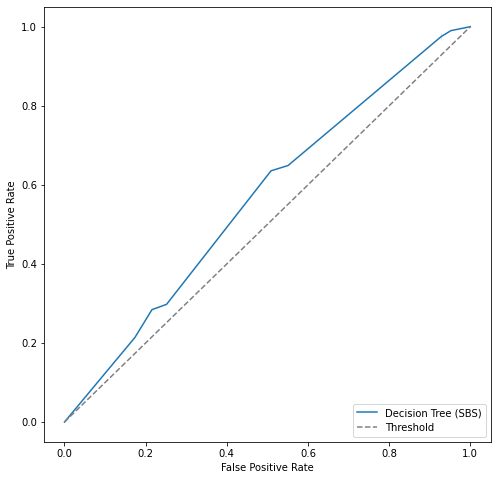

In [4]:
from sklearn.tree import DecisionTreeClassifier
from lib.experiment_helper import prepare_data_exp_ids, print_metrics

cols_to_keep = ['mc_get_fumo', 'mc_mul_est_civil']
X_train, X_test, y_train, y_test, abc = prepare_data_exp_ids(df, cols_to_keep)

clf_ids_decision_tree = DecisionTreeClassifier(criterion='entropy', splitter='best')
clf_ids_decision_tree.fit(X_train, y_train)

y_pred_ids_decision_tree = clf_ids_decision_tree.predict(X_test)
y_pred_proba_ids_decision_tree = clf_ids_decision_tree.predict_proba(X_test)
fpr_ids_decision_tree, tpr_ids_decision_tree, _ = roc_curve(y_test, y_pred_proba_ids_decision_tree[:, 1])

roc_score_decision_tree = roc_auc_score(y_test, y_pred_proba_ids_decision_tree[:, 1])
print(f"\nROC AUC: {roc_score_decision_tree:.4f}")

print_metrics(y_test, y_pred_ids_decision_tree)

plot_roc_curve(tpr_ids_decision_tree, fpr_ids_decision_tree, 'Decision Tree (SBS)', False)

### Random forest (SBS):

Starting process to convert dataframe to numpy array...
  -> Removing empty count columns
  -> Removing empty count columns
  -> Shape: (41762, 26)
Applying undersampling...
  -> Shape after undersampling: (2327, 15)
Splitting data...
  -> Shape after splitting: train=(1861, 14) [0 = 659, 1 = 1202] | test=(466, 14) [0 = 167, 1 = 299]

ROC AUC: 0.5659
Metrics:
  -> Accuracy: 0.6244635193133047
  -> Macro avg: {'precision': 0.5629504504504504, 'recall': 0.5447800052069773, 'f1-score': 0.5365081530233536, 'support': 466}
  -> Weighted avg: {'precision': 0.5925844836252561, 'recall': 0.6244635193133047, 'f1-score': 0.5937008049951445, 'support': 466}
  -> True class results: {'precision': 0.4583333333333333, 'recall': 0.2634730538922156, 'f1-score': 0.33460076045627374, 'support': 167}
  -> False class results: {'precision': 0.6675675675675675, 'recall': 0.8260869565217391, 'f1-score': 0.7384155455904335, 'support': 299}
  -> Confusion matrix: [[ 44 123], [ 52 247]]


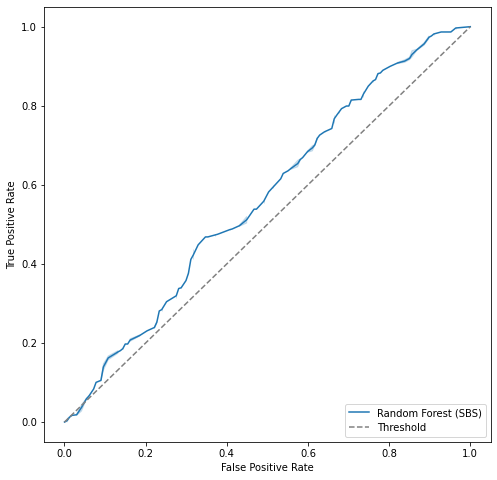

In [5]:
from sklearn.ensemble import RandomForestClassifier
from lib.experiment_helper import prepare_data_exp_ids, print_metrics

cols_to_keep = [
  'mc_get_fator_rh',
  'mc_get_fumo',
  'mc_get_grupo_sanguineo',
  'mc_get_risco_gestacional',
  'mc_mul_est_civil',
  'mc_mul_nivel_inseguranca',
  'mc_mul_qtd_aborto',
  'mc_mul_qtd_filhos_vivos',
  'mc_mul_qtd_gest',
  'mc_dae_escolaridade',
  'mc_dae_numero_res_domic',
  'mc_dae_possui_horta',
  'mc_dae_rfa',
  'idade',
]
X_train, X_test, y_train, y_test, _ = prepare_data_exp_ids(df, cols_to_keep)

clf_ids_rf = RandomForestClassifier(criterion='entropy', n_estimators=150)
clf_ids_rf.fit(X_train, y_train)

y_pred_ids_rf = clf_ids_rf.predict(X_test)
y_pred_proba_ids_rf = clf_ids_rf.predict_proba(X_test)
fpr_ids_rf, tpr_ids_rf, _ = roc_curve(y_test, y_pred_proba_ids_rf[:, 1])

roc_score_rf = roc_auc_score(y_test, y_pred_proba_ids_rf[:, 1])
print(f"\nROC AUC: {roc_score_rf:.4f}")

print_metrics(y_test, y_pred_ids_rf)

plot_roc_curve(tpr_ids_rf, fpr_ids_rf, 'Random Forest (SBS)', False)

### AdaBoost (SBS):

Starting process to convert dataframe to numpy array...
  -> Removing empty count columns
  -> Removing empty count columns
  -> Shape: (41762, 26)
Applying undersampling...
  -> Shape after undersampling: (2327, 11)
Splitting data...
  -> Shape after splitting: train=(1861, 10) [0 = 659, 1 = 1202] | test=(466, 10) [0 = 167, 1 = 299]

ROC AUC: 0.6044
Metrics:
  -> Accuracy: 0.6523605150214592
  -> Macro avg: {'precision': 0.6050597045132564, 'recall': 0.5519796527346644, 'f1-score': 0.5296800239234449, 'support': 466}
  -> Weighted avg: {'precision': 0.623210015522218, 'recall': 0.6523605150214592, 'f1-score': 0.5977213047004949, 'support': 466}
  -> True class results: {'precision': 0.5409836065573771, 'recall': 0.19760479041916168, 'f1-score': 0.2894736842105263, 'support': 167}
  -> False class results: {'precision': 0.6691358024691358, 'recall': 0.9063545150501672, 'f1-score': 0.7698863636363636, 'support': 299}
  -> Confusion matrix: [[ 33 134], [ 28 271]]


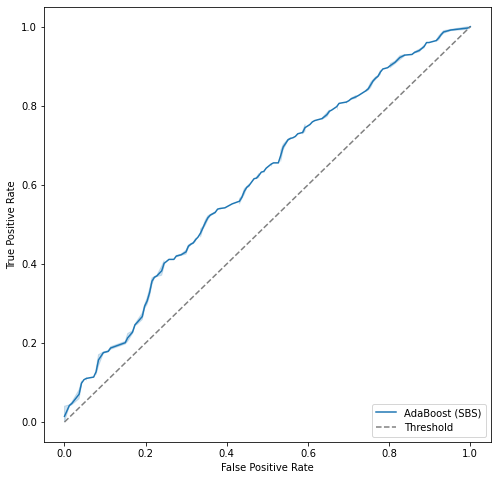

In [6]:
from sklearn.ensemble import AdaBoostClassifier
from lib.experiment_helper import prepare_data_exp_ids, print_metrics

cols_to_keep = [
  'mc_get_fator_rh',
  'mc_get_fumo',
  'mc_get_gravidez_planejada',
  'mc_get_vacina_anti_tetanica',
  'mc_mul_est_civil',
  'mc_mul_nivel_inseguranca',
  'mc_dae_escolaridade',
  'mc_dae_numero_res_domic',
  'mc_dae_possui_horta',
  'mc_dae_sit_moradia',
]
X_train, X_test, y_train, y_test, _ = prepare_data_exp_ids(df, cols_to_keep)

clf_ids_ada = AdaBoostClassifier(learning_rate=0.5, n_estimators=50)
clf_ids_ada.fit(X_train, y_train)

y_pred_ids_ada = clf_ids_ada.predict(X_test)
y_pred_proba_ids_ada = clf_ids_ada.predict_proba(X_test)
fpr_ids_ada, tpr_ids_ada, _ = roc_curve(y_test, y_pred_proba_ids_ada[:, 1])

roc_score_ada = roc_auc_score(y_test, y_pred_proba_ids_ada[:, 1])
print(f"\nROC AUC: {roc_score_ada:.4f}")

print_metrics(y_test, y_pred_ids_ada)

plot_roc_curve(tpr_ids_ada, fpr_ids_ada, 'AdaBoost (SBS)', False)

### GBM (SBS):

Starting process to convert dataframe to numpy array...
  -> Removing empty count columns
  -> Removing empty count columns
  -> Shape: (41762, 26)
Applying undersampling...
  -> Shape after undersampling: (2327, 5)
Splitting data...
  -> Shape after splitting: train=(1861, 4) [0 = 659, 1 = 1202] | test=(466, 4) [0 = 167, 1 = 299]

ROC AUC: 0.6115
Metrics:
  -> Accuracy: 0.6738197424892703
  -> Macro avg: {'precision': 0.6646601086477757, 'recall': 0.567380289588048, 'f1-score': 0.5420028967515002, 'support': 466}
  -> Weighted avg: {'precision': 0.6679456294822248, 'recall': 0.6738197424892703, 'f1-score': 0.6116021913010429, 'support': 466}
  -> True class results: {'precision': 0.6530612244897959, 'recall': 0.19161676646706588, 'f1-score': 0.2962962962962963, 'support': 167}
  -> False class results: {'precision': 0.6762589928057554, 'recall': 0.9431438127090301, 'f1-score': 0.787709497206704, 'support': 299}
  -> Confusion matrix: [[ 32 135], [ 17 282]]


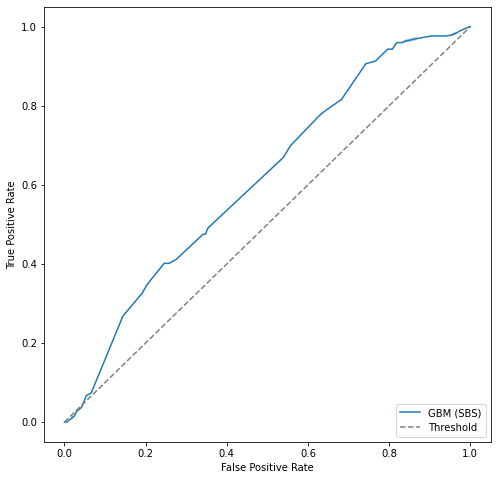

In [7]:
from sklearn.ensemble import GradientBoostingClassifier
from lib.experiment_helper import prepare_data_exp_ids, print_metrics

cols_to_keep = [
  'mc_get_fumo',
  'mc_get_risco_gestacional',
  'mc_mul_nivel_inseguranca',
  'mc_dae_sit_moradia',
]
X_train, X_test, y_train, y_test, _ = prepare_data_exp_ids(df, cols_to_keep)

clf_ids_gbm = GradientBoostingClassifier(learning_rate=1, loss='exponential', n_estimators=150)
clf_ids_gbm.fit(X_train, y_train)

y_pred_ids_gbm = clf_ids_gbm.predict(X_test)
y_pred_proba_ids_gbm = clf_ids_gbm.predict_proba(X_test)
fpr_ids_gbm, tpr_ids_gbm, _ = roc_curve(y_test, y_pred_proba_ids_gbm[:, 1])

roc_score_gbm = roc_auc_score(y_test, y_pred_proba_ids_gbm[:, 1])
print(f"\nROC AUC: {roc_score_gbm:.4f}")

print_metrics(y_test, y_pred_ids_gbm)

plot_roc_curve(tpr_ids_gbm, fpr_ids_gbm, 'GBM (SBS)', False)

### XGBoost (SBS):

/opt/homebrew/Caskroom/miniforge/base/envs/syphilis-env/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/opt/homebrew/Caskroom/miniforge/base/envs/syphilis-env/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Starting process to convert dataframe to numpy array...
  -> Removing empty count columns
  -> Removing empty count columns
  -> Shape: (41762, 26)
Applying undersampling...
  -> Shape after undersampling: (2327, 6)
Splitting data...
  -> Shape after splitting: train=(1861, 5) [0 = 659, 1 = 1202] | test=(466, 5) [0 = 167, 1 = 299]
[08:46:04] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

ROC AUC: 0.5348
Metrics:
  -> Accuracy: 0.5772532188841202
  -> Macro avg: {'precision': 0.5066537081339713, 'recall': 0.5053471652013699, 'f1-score': 0.4981605086070704, 'support': 466}
  -> Weighted avg: {'precision': 0.5458097393063227, 'recall': 0.5772532188841202, 'f1-score': 0.5545942262101545, 'support': 466}
  -> True class results: {'prec

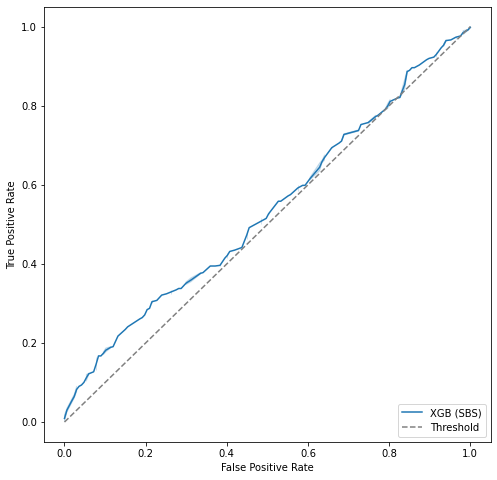

In [8]:
from xgboost import XGBClassifier
from lib.experiment_helper import prepare_data_exp_ids, print_metrics

cols_to_keep = [
  'mc_get_fator_rh',
  'mc_get_vacina_anti_tetanica',
  'mc_mul_nivel_inseguranca',
  'mc_mul_qtd_gest',
  'mc_dae_escolaridade',
]
X_train, X_test, y_train, y_test, _ = prepare_data_exp_ids(df, cols_to_keep)

clf_ids_xgb = XGBClassifier(learning_rate=0.3, max_depth=5)
clf_ids_xgb.fit(X_train, y_train)

y_pred_ids_xgb = clf_ids_xgb.predict(X_test)
y_pred_proba_ids_xgb = clf_ids_xgb.predict_proba(X_test)
fpr_ids_xgb, tpr_ids_xgb, _ = roc_curve(y_test, y_pred_proba_ids_xgb[:, 1])

roc_score_xgb = roc_auc_score(y_test, y_pred_proba_ids_xgb[:, 1])
print(f"\nROC AUC: {roc_score_xgb:.4f}")

print_metrics(y_test, y_pred_ids_xgb)

plot_roc_curve(tpr_ids_xgb, fpr_ids_xgb, 'XGB (SBS)', False)

### KNN (SBS):

Starting process to convert dataframe to numpy array...
  -> Removing empty count columns
  -> Removing empty count columns
  -> Shape: (41762, 26)
Applying undersampling...
  -> Shape after undersampling: (2327, 17)
Splitting data...
  -> Shape after splitting: train=(1861, 16) [0 = 659, 1 = 1202] | test=(466, 16) [0 = 167, 1 = 299]

ROC AUC: 0.5669
Metrics:
  -> Accuracy: 0.6437768240343348
  -> Macro avg: {'precision': 0.5922542204568024, 'recall': 0.5651172571245469, 'f1-score': 0.5593255098553036, 'support': 466}
  -> Weighted avg: {'precision': 0.6168954656460569, 'recall': 0.6437768240343348, 'f1-score': 0.6139704778535001, 'support': 466}
  -> True class results: {'precision': 0.5052631578947369, 'recall': 0.2874251497005988, 'f1-score': 0.366412213740458, 'support': 167}
  -> False class results: {'precision': 0.6792452830188679, 'recall': 0.842809364548495, 'f1-score': 0.7522388059701492, 'support': 299}
  -> Confusion matrix: [[ 48 119], [ 47 252]]


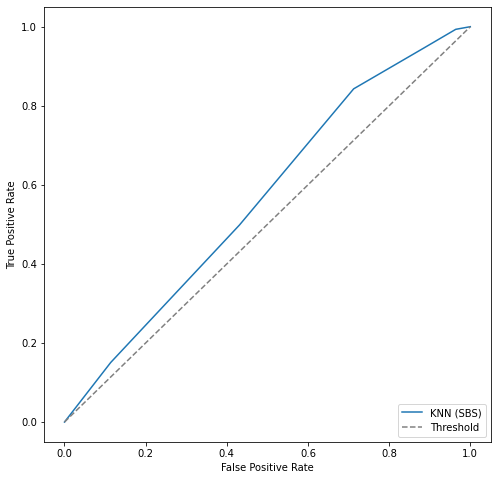

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from lib.experiment_helper import prepare_data_exp_ids, print_metrics

cols_to_keep = [
  'mc_get_alcool',
  'mc_get_fumo',
  'mc_get_grupo_sanguineo',
  'mc_get_risco_gestacional',
  'mc_mul_chefe_familia',
  'mc_mul_nivel_inseguranca',
  'mc_mul_qtd_filhos_vivos',
  'mc_mul_qtd_gest',
  'mc_mul_rec_inf_plan_fam',
  'mc_mul_renda_familiar',
  'mc_dae_escolaridade',
  'mc_dae_mrd_lgd_red_esg',
  'mc_dae_possui_arv_frut',
  'mc_dae_rfa',
  'mc_dae_trat_agua_uso',
  'idade',
]
X_train, X_test, y_train, y_test, _ = prepare_data_exp_ids(df, cols_to_keep)

clf_ids_knn = KNeighborsClassifier(n_neighbors=5, p=1, weights='uniform')
clf_ids_knn.fit(X_train, y_train)

y_pred_ids_knn = clf_ids_knn.predict(X_test)
y_pred_proba_ids_knn = clf_ids_knn.predict_proba(X_test)
fpr_ids_knn, tpr_ids_knn, _ = roc_curve(y_test, y_pred_proba_ids_knn[:, 1])

roc_score_knn = roc_auc_score(y_test, y_pred_proba_ids_knn[:, 1])
print(f"\nROC AUC: {roc_score_knn:.4f}")

print_metrics(y_test, y_pred_ids_knn)

plot_roc_curve(tpr_ids_knn, fpr_ids_knn, 'KNN (SBS)', False)

### SVM (SFS):

Starting process to convert dataframe to numpy array...
  -> Removing empty count columns
  -> Removing empty count columns
  -> Shape: (41762, 26)
Applying undersampling...
  -> Shape after undersampling: (2327, 20)
Splitting data...
  -> Shape after splitting: train=(1861, 19) [0 = 659, 1 = 1202] | test=(466, 19) [0 = 167, 1 = 299]

ROC AUC: 0.5906
Metrics:
  -> Accuracy: 0.6373390557939914
  -> Macro avg: {'precision': 0.5592597926267281, 'recall': 0.5164820859952336, 'f1-score': 0.4600972118436658, 'support': 466}
  -> Weighted avg: {'precision': 0.5848977596368743, 'recall': 0.6373390557939914, 'f1-score': 0.5477223931224785, 'support': 466}
  -> True class results: {'precision': 0.46875, 'recall': 0.08982035928143713, 'f1-score': 0.1507537688442211, 'support': 167}
  -> False class results: {'precision': 0.6497695852534562, 'recall': 0.9431438127090301, 'f1-score': 0.7694406548431105, 'support': 299}
  -> Confusion matrix: [[ 15 152], [ 17 282]]


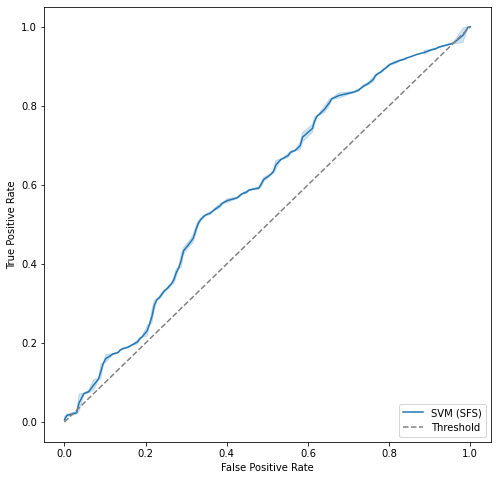

In [10]:
from sklearn.svm import SVC
from lib.experiment_helper import prepare_data_exp_ids, print_metrics

cols_to_keep = [
  'mc_get_alcool',
  'mc_get_fator_rh',
  'mc_get_fumo',
  'mc_get_gravidez_planejada',
  'mc_get_risco_gestacional',
  'mc_get_vacina_anti_tetanica',
  'mc_mul_chefe_familia',
  'mc_mul_est_civil',
  'mc_mul_nivel_inseguranca',
  'mc_mul_qtd_aborto',
  'mc_mul_qtd_filhos_vivos',
  'mc_mul_rec_inf_plan_fam',
  'mc_mul_renda_familiar',
  'mc_dae_escolaridade',
  'mc_dae_mrd_lgd_red_esg',
  'mc_dae_possui_arv_frut',
  'mc_dae_possui_horta',
  'mc_dae_rfa',
  'mc_dae_trat_agua_uso',
]
X_train, X_test, y_train, y_test, _ = prepare_data_exp_ids(df, cols_to_keep)

clf_ids_svm = SVC(gamma='scale', kernel='rbf', probability=True)
clf_ids_svm.fit(X_train, y_train)

y_pred_ids_svm = clf_ids_svm.predict(X_test)
y_pred_proba_ids_svm = clf_ids_svm.predict_proba(X_test)
fpr_ids_svm, tpr_ids_svm, _ = roc_curve(y_test, y_pred_proba_ids_svm[:, 1])

roc_score_svm = roc_auc_score(y_test, y_pred_proba_ids_svm[:, 1])
print(f"\nROC AUC: {roc_score_svm:.4f}")

print_metrics(y_test, y_pred_ids_svm)

plot_roc_curve(tpr_ids_svm, fpr_ids_svm, 'SVM (SFS)', False)

### All:

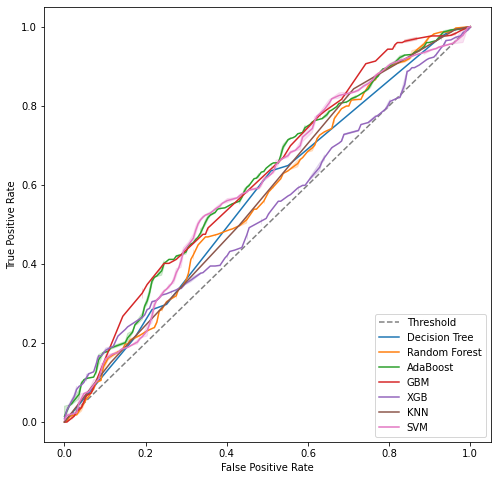

In [11]:
plt.figure(figsize = (8, 8))
ax = sns.lineplot(x = [0, 1], y = [0, 1], color = 'gray', label='Threshold')
ax.lines[0].set_linestyle('--')

sns.lineplot(x = fpr_ids_decision_tree, y = tpr_ids_decision_tree, label='Decision Tree')
sns.lineplot(x = fpr_ids_rf, y = tpr_ids_rf, label='Random Forest')
sns.lineplot(x = fpr_ids_ada, y = tpr_ids_ada, label='AdaBoost')
sns.lineplot(x = fpr_ids_gbm, y = tpr_ids_gbm, label='GBM')
sns.lineplot(x = fpr_ids_xgb, y = tpr_ids_xgb, label='XGB')
sns.lineplot(x = fpr_ids_knn, y = tpr_ids_knn, label='KNN')
sns.lineplot(x = fpr_ids_svm, y = tpr_ids_svm, label='SVM')

plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")

## BDS - Exp 2:

### Decision tree (SFS):

Starting process to convert dataframe to numpy array...
  -> Removing empty count columns
  -> Removing empty count columns
  -> Shape: (41762, 26)
Applying undersampling...
  -> Shape after undersampling: (1652, 5)
Splitting data...
  -> Shape after splitting: train=(1321, 4) [0 = 660, 1 = 661] | test=(331, 4) [0 = 166, 1 = 165]

ROC AUC: 0.5480
Metrics:
  -> Accuracy: 0.5317220543806647
  -> Macro avg: {'precision': 0.5317704893976081, 'recall': 0.5316173786053304, 'f1-score': 0.5311057696701609, 'support': 331}
  -> Weighted avg: {'precision': 0.5317683835273062, 'recall': 0.5317220543806647, 'f1-score': 0.5311571267293697, 'support': 331}
  -> True class results: {'precision': 0.5310734463276836, 'recall': 0.5662650602409639, 'f1-score': 0.5481049562682215, 'support': 166}
  -> False class results: {'precision': 0.5324675324675324, 'recall': 0.49696969696969695, 'f1-score': 0.5141065830721003, 'support': 165}
  -> Confusion matrix: [[94 72], [83 82]]


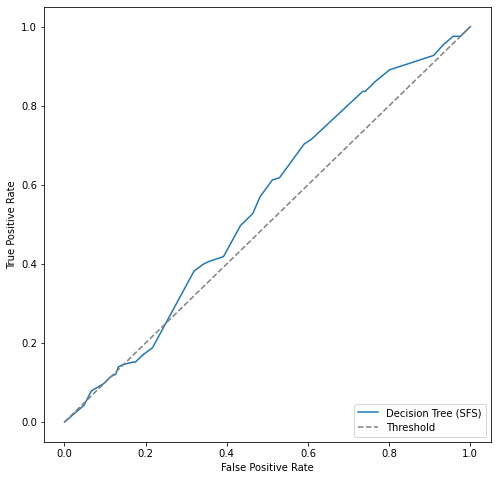

In [12]:
from sklearn.tree import DecisionTreeClassifier
from lib.experiment_helper import prepare_data_exp_bds, print_metrics

cols_to_keep = [
  'mc_get_risco_gestacional',
  'mc_dae_escolaridade',
  'mc_dae_possui_arv_frut',
  'mc_dae_possui_horta',
]
X_train, X_test, y_train, y_test, abc = prepare_data_exp_bds(df, cols_to_keep)

clf_bds_decision_tree = DecisionTreeClassifier(criterion='entropy', splitter='best')
clf_bds_decision_tree.fit(X_train, y_train)

y_pred_bds_decision_tree = clf_bds_decision_tree.predict(X_test)
y_pred_proba_bds_decision_tree = clf_bds_decision_tree.predict_proba(X_test)
fpr_bds_decision_tree, tpr_bds_decision_tree, _ = roc_curve(y_test, y_pred_proba_bds_decision_tree[:, 1])

roc_score_decision_tree = roc_auc_score(y_test, y_pred_proba_bds_decision_tree[:, 1])
print(f"\nROC AUC: {roc_score_decision_tree:.4f}")

print_metrics(y_test, y_pred_bds_decision_tree)

plot_roc_curve(tpr_bds_decision_tree, fpr_bds_decision_tree, 'Decision Tree (SFS)', False)

### Random forest (SFS):

Starting process to convert dataframe to numpy array...
  -> Removing empty count columns
  -> Removing empty count columns
  -> Shape: (41762, 26)
Applying undersampling...
  -> Shape after undersampling: (1652, 5)
Splitting data...
  -> Shape after splitting: train=(1321, 4) [0 = 660, 1 = 661] | test=(331, 4) [0 = 166, 1 = 165]

ROC AUC: 0.5833
Metrics:
  -> Accuracy: 0.5619335347432024
  -> Macro avg: {'precision': 0.5623388581952118, 'recall': 0.5617926250456371, 'f1-score': 0.560907552262019, 'support': 331}
  -> Weighted avg: {'precision': 0.5623257832451469, 'recall': 0.5619335347432024, 'f1-score': 0.5609716761670931, 'support': 331}
  -> True class results: {'precision': 0.5580110497237569, 'recall': 0.608433734939759, 'f1-score': 0.5821325648414986, 'support': 166}
  -> False class results: {'precision': 0.5666666666666667, 'recall': 0.5151515151515151, 'f1-score': 0.5396825396825397, 'support': 165}
  -> Confusion matrix: [[101  65], [80 85]]


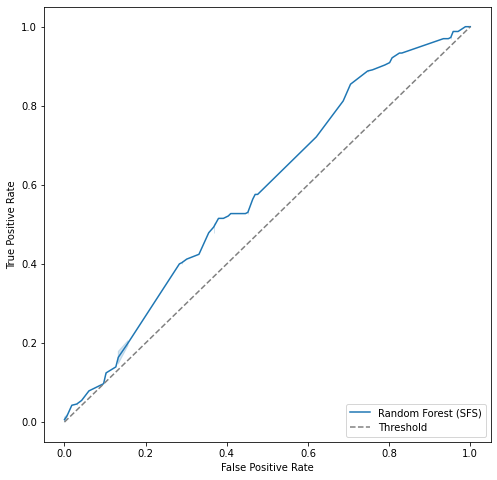

In [13]:
from sklearn.ensemble import RandomForestClassifier
from lib.experiment_helper import prepare_data_exp_bds, print_metrics

cols_to_keep = [
  'mc_get_alcool',
  'mc_dae_escolaridade',
  'mc_dae_possui_arv_frut',
  'mc_dae_possui_horta',
]
X_train, X_test, y_train, y_test, _ = prepare_data_exp_bds(df, cols_to_keep)

clf_bds_rf = RandomForestClassifier(criterion='gini', n_estimators=100)
clf_bds_rf.fit(X_train, y_train)

y_pred_bds_rf = clf_bds_rf.predict(X_test)
y_pred_proba_bds_rf = clf_bds_rf.predict_proba(X_test)
fpr_bds_rf, tpr_bds_rf, _ = roc_curve(y_test, y_pred_proba_bds_rf[:, 1])

roc_score_rf = roc_auc_score(y_test, y_pred_proba_bds_rf[:, 1])
print(f"\nROC AUC: {roc_score_rf:.4f}")

print_metrics(y_test, y_pred_bds_rf)

plot_roc_curve(tpr_bds_rf, fpr_bds_rf, 'Random Forest (SFS)', False)

### AdaBoost (SFS):

Starting process to convert dataframe to numpy array...
  -> Removing empty count columns
  -> Removing empty count columns
  -> Shape: (41762, 26)
Applying undersampling...
  -> Shape after undersampling: (1652, 10)
Splitting data...
  -> Shape after splitting: train=(1321, 9) [0 = 660, 1 = 661] | test=(331, 9) [0 = 166, 1 = 165]

ROC AUC: 0.6023
Metrics:
  -> Accuracy: 0.5800604229607251
  -> Macro avg: {'precision': 0.5814889336016096, 'recall': 0.5798466593647316, 'f1-score': 0.5778409872918291, 'support': 331}
  -> Weighted avg: {'precision': 0.5814585397581865, 'recall': 0.5800604229607251, 'f1-score': 0.5779334637780332, 'support': 331}
  -> True class results: {'precision': 0.5714285714285714, 'recall': 0.6506024096385542, 'f1-score': 0.6084507042253521, 'support': 166}
  -> False class results: {'precision': 0.5915492957746479, 'recall': 0.509090909090909, 'f1-score': 0.5472312703583062, 'support': 165}
  -> Confusion matrix: [[108  58], [81 84]]


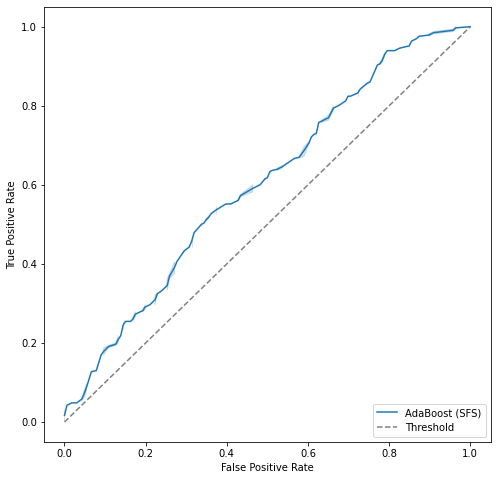

In [14]:
from sklearn.ensemble import AdaBoostClassifier
from lib.experiment_helper import prepare_data_exp_bds, print_metrics

cols_to_keep = [
  'mc_get_fumo',
  'mc_get_risco_gestacional',
  'mc_get_vacina_anti_tetanica',
  'mc_mul_est_civil',
  'mc_dae_escolaridade',
  'mc_dae_numero_res_domic',
  'mc_dae_possui_arv_frut',
  'mc_dae_possui_horta',
  'mc_dae_rfa',
]
X_train, X_test, y_train, y_test, _ = prepare_data_exp_bds(df, cols_to_keep)

clf_bds_ada = AdaBoostClassifier(learning_rate=0.5, n_estimators=50)
clf_bds_ada.fit(X_train, y_train)

y_pred_bds_ada = clf_bds_ada.predict(X_test)
y_pred_proba_bds_ada = clf_bds_ada.predict_proba(X_test)
fpr_bds_ada, tpr_bds_ada, _ = roc_curve(y_test, y_pred_proba_bds_ada[:, 1])

roc_score_ada = roc_auc_score(y_test, y_pred_proba_bds_ada[:, 1])
print(f"\nROC AUC: {roc_score_ada:.4f}")

print_metrics(y_test, y_pred_bds_ada)

plot_roc_curve(tpr_bds_ada, fpr_bds_ada, 'AdaBoost (SFS)', False)

### GBM (SBS):

Starting process to convert dataframe to numpy array...
  -> Removing empty count columns
  -> Removing empty count columns
  -> Shape: (41762, 26)
Applying undersampling...
  -> Shape after undersampling: (1652, 13)
Splitting data...
  -> Shape after splitting: train=(1321, 12) [0 = 660, 1 = 661] | test=(331, 12) [0 = 166, 1 = 165]

ROC AUC: 0.5911
Metrics:
  -> Accuracy: 0.5830815709969789
  -> Macro avg: {'precision': 0.5837621287856513, 'recall': 0.5832055494706097, 'f1-score': 0.5824374725756911, 'support': 331}
  -> Weighted avg: {'precision': 0.5837873346296762, 'recall': 0.5830815709969789, 'f1-score': 0.5823879265432843, 'support': 331}
  -> True class results: {'precision': 0.5921052631578947, 'recall': 0.5421686746987951, 'f1-score': 0.5660377358490565, 'support': 166}
  -> False class results: {'precision': 0.5754189944134078, 'recall': 0.6242424242424243, 'f1-score': 0.5988372093023256, 'support': 165}
  -> Confusion matrix: [[90 76], [ 62 103]]


/opt/homebrew/Caskroom/miniforge/base/envs/syphilis-env/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


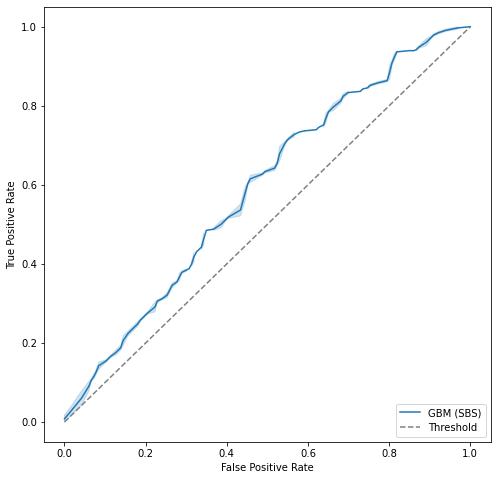

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
from lib.experiment_helper import prepare_data_exp_bds, print_metrics

cols_to_keep = [
  'mc_get_alcool',
  'mc_get_fumo',
  'mc_get_gravidez_planejada',
  'mc_get_vacina_anti_tetanica',
  'mc_mul_est_civil',
  'mc_mul_nivel_inseguranca',
  'mc_mul_qtd_filhos_vivos',
  'mc_mul_rec_inf_plan_fam',
  'mc_dae_possui_arv_frut',
  'mc_dae_rfa',
  'mc_dae_sit_moradia',
  'mc_dae_trat_agua_uso',
]
X_train, X_test, y_train, y_test, _ = prepare_data_exp_bds(df, cols_to_keep)

clf_bds_gbm = GradientBoostingClassifier(learning_rate=1, loss='deviance', n_estimators=50)
clf_bds_gbm.fit(X_train, y_train)

y_pred_bds_gbm = clf_bds_gbm.predict(X_test)
y_pred_proba_bds_gbm = clf_bds_gbm.predict_proba(X_test)
fpr_bds_gbm, tpr_bds_gbm, _ = roc_curve(y_test, y_pred_proba_bds_gbm[:, 1])

roc_score_gbm = roc_auc_score(y_test, y_pred_proba_bds_gbm[:, 1])
print(f"\nROC AUC: {roc_score_gbm:.4f}")

print_metrics(y_test, y_pred_bds_gbm)

plot_roc_curve(tpr_bds_gbm, fpr_bds_gbm, 'GBM (SBS)', False)

### XGBoost (SBS):

Starting process to convert dataframe to numpy array...
  -> Removing empty count columns
  -> Removing empty count columns
  -> Shape: (41762, 26)
Applying undersampling...
  -> Shape after undersampling: (1652, 13)
Splitting data...
  -> Shape after splitting: train=(1321, 12) [0 = 660, 1 = 661] | test=(331, 12) [0 = 166, 1 = 165]
[08:46:10] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/homebrew/Caskroom/miniforge/base/envs/syphilis-env/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC AUC: 0.5909
Metrics:
  -> Accuracy: 0.552870090634441
  -> Macro avg: {'precision': 0.5528593339176162, 'recall': 0.5528477546549835, 'f1-score': 0.552833357674894, 'support': 331}
  -> Weighted avg: {'precision': 0.5528614852609812, 'recall': 0.552870090634441, 'f1-score': 0.5528456019947432, 'support': 331}
  -> True class results: {'precision': 0.5535714285714286, 'recall': 0.5602409638554217, 'f1-score': 0.5568862275449101, 'support': 166}
  -> False class results: {'precision': 0.5521472392638037, 'recall': 0.5454545454545454, 'f1-score': 0.5487804878048781, 'support': 165}
  -> Confusion matrix: [[93 73], [75 90]]


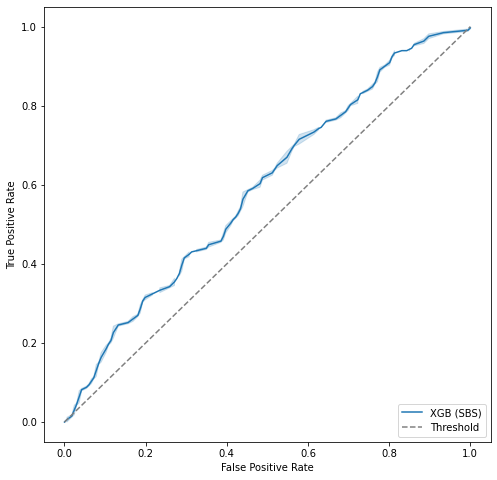

In [16]:
from xgboost import XGBClassifier
from lib.experiment_helper import prepare_data_exp_bds, print_metrics

cols_to_keep = [
  'mc_get_fumo',
  'mc_get_gravidez_planejada',
  'mc_get_risco_gestacional',
  'mc_mul_chefe_familia',
  'mc_mul_nivel_inseguranca',
  'mc_mul_qtd_filhos_vivos',
  'mc_mul_rec_inf_plan_fam',
  'mc_mul_tipo_const_casa',
  'mc_dae_escolaridade',
  'mc_dae_possui_arv_frut',
  'mc_dae_sit_moradia',
  'idade',
]
X_train, X_test, y_train, y_test, _ = prepare_data_exp_bds(df, cols_to_keep)

clf_bds_xgb = XGBClassifier(learning_rate=0.3, max_depth=5)
clf_bds_xgb.fit(X_train, y_train)

y_pred_bds_xgb = clf_bds_xgb.predict(X_test)
y_pred_proba_bds_xgb = clf_bds_xgb.predict_proba(X_test)
fpr_bds_xgb, tpr_bds_xgb, _ = roc_curve(y_test, y_pred_proba_bds_xgb[:, 1])

roc_score_xgb = roc_auc_score(y_test, y_pred_proba_bds_xgb[:, 1])
print(f"\nROC AUC: {roc_score_xgb:.4f}")

print_metrics(y_test, y_pred_bds_xgb)

plot_roc_curve(tpr_bds_xgb, fpr_bds_xgb, 'XGB (SBS)', False)

### KNN (SBS):

Starting process to convert dataframe to numpy array...
  -> Removing empty count columns
  -> Removing empty count columns
  -> Shape: (41762, 26)
Applying undersampling...
  -> Shape after undersampling: (1652, 22)
Splitting data...
  -> Shape after splitting: train=(1321, 21) [0 = 660, 1 = 661] | test=(331, 21) [0 = 166, 1 = 165]

ROC AUC: 0.5779
Metrics:
  -> Accuracy: 0.5619335347432024
  -> Macro avg: {'precision': 0.5623388581952118, 'recall': 0.5617926250456371, 'f1-score': 0.560907552262019, 'support': 331}
  -> Weighted avg: {'precision': 0.5623257832451469, 'recall': 0.5619335347432024, 'f1-score': 0.5609716761670931, 'support': 331}
  -> True class results: {'precision': 0.5580110497237569, 'recall': 0.608433734939759, 'f1-score': 0.5821325648414986, 'support': 166}
  -> False class results: {'precision': 0.5666666666666667, 'recall': 0.5151515151515151, 'f1-score': 0.5396825396825397, 'support': 165}
  -> Confusion matrix: [[101  65], [80 85]]


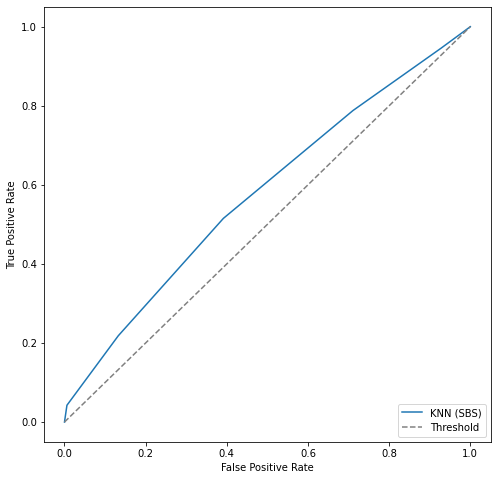

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from lib.experiment_helper import prepare_data_exp_bds, print_metrics

cols_to_keep = [
  'mc_get_alcool',
  'mc_get_fator_rh',
  'mc_get_fumo',
  'mc_get_gravidez_planejada',
  'mc_get_grupo_sanguineo',
  'mc_get_risco_gestacional',
  'mc_get_vacina_anti_tetanica',
  'mc_mul_est_civil',
  'mc_mul_nivel_inseguranca',
  'mc_mul_qtd_aborto',
  'mc_mul_qtd_filhos_vivos',
  'mc_mul_rec_inf_plan_fam',
  'mc_mul_renda_familiar',
  'mc_dae_escolaridade',
  'mc_dae_mrd_lgd_red_esg',
  'mc_dae_possui_arv_frut',
  'mc_dae_possui_horta',
  'mc_dae_rfa',
  'mc_dae_sit_moradia',
  'mc_dae_trat_agua_uso',
  'idade',
]
X_train, X_test, y_train, y_test, _ = prepare_data_exp_bds(df, cols_to_keep)

clf_bds_knn = KNeighborsClassifier(n_neighbors=5, p=1, weights='uniform')
clf_bds_knn.fit(X_train, y_train)

y_pred_bds_knn = clf_bds_knn.predict(X_test)
y_pred_proba_bds_knn = clf_bds_knn.predict_proba(X_test)
fpr_bds_knn, tpr_bds_knn, _ = roc_curve(y_test, y_pred_proba_bds_knn[:, 1])

roc_score_knn = roc_auc_score(y_test, y_pred_proba_bds_knn[:, 1])
print(f"\nROC AUC: {roc_score_knn:.4f}")

print_metrics(y_test, y_pred_bds_knn)

plot_roc_curve(tpr_bds_knn, fpr_bds_knn, 'KNN (SBS)', False)

### SVM (SBS):

Starting process to convert dataframe to numpy array...
  -> Removing empty count columns
  -> Removing empty count columns
  -> Shape: (41762, 26)
Applying undersampling...
  -> Shape after undersampling: (1652, 14)
Splitting data...
  -> Shape after splitting: train=(1321, 13) [0 = 660, 1 = 661] | test=(331, 13) [0 = 166, 1 = 165]

ROC AUC: 0.6020
Metrics:
  -> Accuracy: 0.6102719033232629
  -> Macro avg: {'precision': 0.6113572588982426, 'recall': 0.6101131799926981, 'f1-score': 0.6091159588784021, 'support': 331}
  -> Weighted avg: {'precision': 0.6113262487389574, 'recall': 0.6102719033232629, 'f1-score': 0.6091801780142276, 'support': 331}
  -> True class results: {'precision': 0.6010928961748634, 'recall': 0.6626506024096386, 'f1-score': 0.6303724928366763, 'support': 166}
  -> False class results: {'precision': 0.6216216216216216, 'recall': 0.5575757575757576, 'f1-score': 0.5878594249201279, 'support': 165}
  -> Confusion matrix: [[110  56], [73 92]]


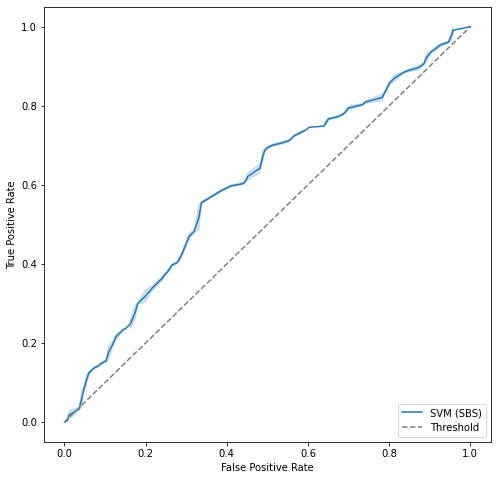

In [18]:
from sklearn.svm import SVC
from lib.experiment_helper import prepare_data_exp_bds, print_metrics

cols_to_keep = [
  'mc_get_fator_rh',
  'mc_get_gravidez_planejada',
  'mc_get_risco_gestacional',
  'mc_get_vacina_anti_tetanica',
  'mc_mul_chefe_familia',
  'mc_mul_est_civil',
  'mc_mul_nivel_inseguranca',
  'mc_mul_qtd_aborto',
  'mc_mul_qtd_gest',
  'mc_mul_renda_familiar',
  'mc_dae_escolaridade',
  'mc_dae_possui_arv_frut',
  'mc_dae_trat_agua_uso',
]
X_train, X_test, y_train, y_test, _ = prepare_data_exp_bds(df, cols_to_keep)

clf_bds_svm = SVC(gamma='scale', kernel='rbf', probability=True)
clf_bds_svm.fit(X_train, y_train)

y_pred_bds_svm = clf_bds_svm.predict(X_test)
y_pred_proba_bds_svm = clf_bds_svm.predict_proba(X_test)
fpr_bds_svm, tpr_bds_svm, _ = roc_curve(y_test, y_pred_proba_bds_svm[:, 1])

roc_score_svm = roc_auc_score(y_test, y_pred_proba_bds_svm[:, 1])
print(f"\nROC AUC: {roc_score_svm:.4f}")

print_metrics(y_test, y_pred_bds_svm)

plot_roc_curve(tpr_bds_svm, fpr_bds_svm, 'SVM (SBS)', False)

### All:

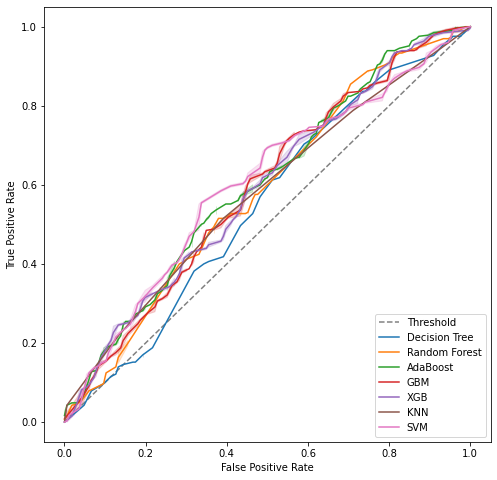

In [19]:
plt.figure(figsize = (8, 8))
ax = sns.lineplot(x = [0, 1], y = [0, 1], color = 'gray', label='Threshold')
ax.lines[0].set_linestyle('--')

sns.lineplot(x = fpr_bds_decision_tree, y = tpr_bds_decision_tree, label='Decision Tree')
sns.lineplot(x = fpr_bds_rf, y = tpr_bds_rf, label='Random Forest')
sns.lineplot(x = fpr_bds_ada, y = tpr_bds_ada, label='AdaBoost')
sns.lineplot(x = fpr_bds_gbm, y = tpr_bds_gbm, label='GBM')
sns.lineplot(x = fpr_bds_xgb, y = tpr_bds_xgb, label='XGB')
sns.lineplot(x = fpr_bds_knn, y = tpr_bds_knn, label='KNN')
sns.lineplot(x = fpr_bds_svm, y = tpr_bds_svm, label='SVM')

plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")

## IODS - Exp 3:

### Decision tree (SBS):

Starting process to convert dataframe to numpy array...
  -> Removing empty count columns
  -> Removing empty count columns
  -> Shape: (41762, 26)
  -> Applying one-hot encoding
  -> Shape after one-hot encoding: (41762, 97)
Applying undersampling...
  -> Shape after undersampling: (2327, 12)
Splitting data...
  -> Shape after splitting: train=(1861, 11) [0 = 659, 1 = 1202] | test=(466, 11) [0 = 167, 1 = 299]

ROC AUC: 0.5451
Metrics:
  -> Accuracy: 0.6137339055793991
  -> Macro avg: {'precision': 0.5448124765775895, 'recall': 0.5311317165001102, 'f1-score': 0.5199175824175823, 'support': 466}
  -> Weighted avg: {'precision': 0.5773040073927282, 'recall': 0.6137339055793991, 'f1-score': 0.5800328962882612, 'support': 466}
  -> True class results: {'precision': 0.43010752688172044, 'recall': 0.23952095808383234, 'f1-score': 0.3076923076923077, 'support': 167}
  -> False class results: {'precision': 0.6595174262734584, 'recall': 0.822742474916388, 'f1-score': 0.7321428571428571, 'suppor

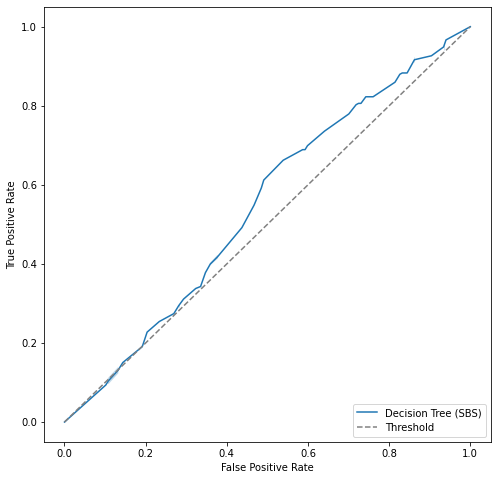

In [20]:
from sklearn.tree import DecisionTreeClassifier
from lib.experiment_helper import prepare_data_exp_iods, print_metrics

cols_to_keep = [
  'mc_get_alcool_0.0',
  'mc_get_fumo_1.0',
  'mc_get_gravidez_planejada_2.0',
  'mc_get_grupo_sanguineo_1.0',
  'mc_mul_chefe_familia_0.0',
  'mc_mul_est_civil_1.0',
  'mc_mul_qtd_filhos_vivos_4.0',
  'mc_mul_qtd_gest_2.0',
  'mc_dae_escolaridade_2.0',
  'mc_dae_escolaridade_4.0',
  'mc_dae_escolaridade_5.0',
]
X_train, X_test, y_train, y_test, _ = prepare_data_exp_iods(df, cols_to_keep)

clf_iods_decision_tree = DecisionTreeClassifier(criterion='entropy', splitter='best')
clf_iods_decision_tree.fit(X_train, y_train)

y_pred_iods_decision_tree = clf_iods_decision_tree.predict(X_test)
y_pred_proba_iods_decision_tree = clf_iods_decision_tree.predict_proba(X_test)
fpr_iods_decision_tree, tpr_iods_decision_tree, _ = roc_curve(y_test, y_pred_proba_iods_decision_tree[:, 1])

roc_score_decision_tree = roc_auc_score(y_test, y_pred_proba_iods_decision_tree[:, 1])
print(f"\nROC AUC: {roc_score_decision_tree:.4f}")

print_metrics(y_test, y_pred_iods_decision_tree)

plot_roc_curve(tpr_iods_decision_tree, fpr_iods_decision_tree, 'Decision Tree (SBS)', False)

### Random forest (SBS):

Starting process to convert dataframe to numpy array...
  -> Removing empty count columns
  -> Removing empty count columns
  -> Shape: (41762, 26)
  -> Applying one-hot encoding
  -> Shape after one-hot encoding: (41762, 97)
Applying undersampling...
  -> Shape after undersampling: (2327, 43)
Splitting data...
  -> Shape after splitting: train=(1861, 42) [0 = 659, 1 = 1202] | test=(466, 42) [0 = 167, 1 = 299]

ROC AUC: 0.5884
Metrics:
  -> Accuracy: 0.648068669527897
  -> Macro avg: {'precision': 0.5976708215812938, 'recall': 0.564496425209781, 'f1-score': 0.5562214015283488, 'support': 466}
  -> Weighted avg: {'precision': 0.6204534103790733, 'recall': 0.648068669527897, 'f1-score': 0.6134093231129731, 'support': 466}
  -> True class results: {'precision': 0.5172413793103449, 'recall': 0.2694610778443114, 'f1-score': 0.35433070866141736, 'support': 167}
  -> False class results: {'precision': 0.6781002638522428, 'recall': 0.8595317725752508, 'f1-score': 0.7581120943952802, 'support':

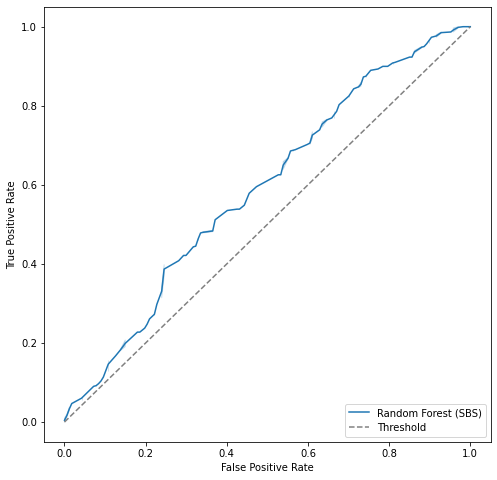

In [21]:
from sklearn.ensemble import RandomForestClassifier
from lib.experiment_helper import prepare_data_exp_iods, print_metrics

cols_to_keep = [
  'idade',
  'mc_get_alcool_2.0',
  'mc_get_fator_rh_2.0',
  'mc_get_fumo_0.0',
  'mc_get_gravidez_planejada_2.0',
  'mc_get_grupo_sanguineo_2.0',
  'mc_get_grupo_sanguineo_3.0',
  'mc_get_risco_gestacional_0.0',
  'mc_get_risco_gestacional_1.0',
  'mc_get_risco_gestacional_2.0',
  'mc_mul_chefe_familia_0.0',
  'mc_mul_chefe_familia_2.0',
  'mc_mul_est_civil_1.0',
  'mc_mul_est_civil_3.0',
  'mc_mul_est_civil_4.0',
  'mc_mul_est_civil_5.0',
  'mc_mul_nivel_inseguranca_0.0',
  'mc_mul_nivel_inseguranca_2.0',
  'mc_mul_qtd_aborto_2.0',
  'mc_mul_qtd_filhos_vivos_0.0',
  'mc_mul_qtd_filhos_vivos_1.0',
  'mc_mul_qtd_gest_2.0',
  'mc_mul_rec_inf_plan_fam_1.0',
  'mc_mul_rec_inf_plan_fam_2.0',
  'mc_mul_tipo_const_casa_0.0',
  'mc_mul_tipo_const_casa_5.0',
  'mc_dae_escolaridade_2.0',
  'mc_dae_escolaridade_4.0',
  'mc_dae_escolaridade_5.0',
  'mc_dae_escolaridade_7.0',
  'mc_dae_escolaridade_9.0',
  'mc_dae_mrd_lgd_red_esg_0.0',
  'mc_dae_numero_res_domic_3.0',
  'mc_dae_numero_res_domic_4.0',
  'mc_dae_possui_arv_frut_1.0',
  'mc_dae_possui_horta_1.0',
  'mc_dae_rfa_0.0',
  'mc_dae_rfa_2.0',
  'mc_dae_rfa_3.0',
  'mc_dae_sit_moradia_1.0',
  'mc_dae_trat_agua_uso_0.0',
  'mc_dae_trat_agua_uso_4.0',
]
X_train, X_test, y_train, y_test, _ = prepare_data_exp_iods(df, cols_to_keep)

clf_iods_rf = RandomForestClassifier(criterion='entropy', n_estimators=150)
clf_iods_rf.fit(X_train, y_train)

y_pred_iods_rf = clf_iods_rf.predict(X_test)
y_pred_proba_iods_rf = clf_iods_rf.predict_proba(X_test)
fpr_iods_rf, tpr_iods_rf, _ = roc_curve(y_test, y_pred_proba_iods_rf[:, 1])

roc_score_rf = roc_auc_score(y_test, y_pred_proba_iods_rf[:, 1])
print(f"\nROC AUC: {roc_score_rf:.4f}")

print_metrics(y_test, y_pred_iods_rf)

plot_roc_curve(tpr_iods_rf, fpr_iods_rf, 'Random Forest (SBS)', False)

### AdaBoost (SBS):

Starting process to convert dataframe to numpy array...
  -> Removing empty count columns
  -> Removing empty count columns
  -> Shape: (41762, 26)
  -> Applying one-hot encoding
  -> Shape after one-hot encoding: (41762, 97)
Applying undersampling...
  -> Shape after undersampling: (2327, 14)
Splitting data...
  -> Shape after splitting: train=(1861, 13) [0 = 659, 1 = 1202] | test=(466, 13) [0 = 167, 1 = 299]

ROC AUC: 0.5925
Metrics:
  -> Accuracy: 0.6523605150214592
  -> Macro avg: {'precision': 0.6053387748303003, 'recall': 0.5506578815612921, 'f1-score': 0.5268620421670134, 'support': 466}
  -> Weighted avg: {'precision': 0.6231746073166019, 'recall': 0.6523605150214592, 'f1-score': 0.5958862022369585, 'support': 466}
  -> True class results: {'precision': 0.5423728813559322, 'recall': 0.19161676646706588, 'f1-score': 0.2831858407079646, 'support': 167}
  -> False class results: {'precision': 0.6683046683046683, 'recall': 0.9096989966555183, 'f1-score': 0.7705382436260623, 'suppor

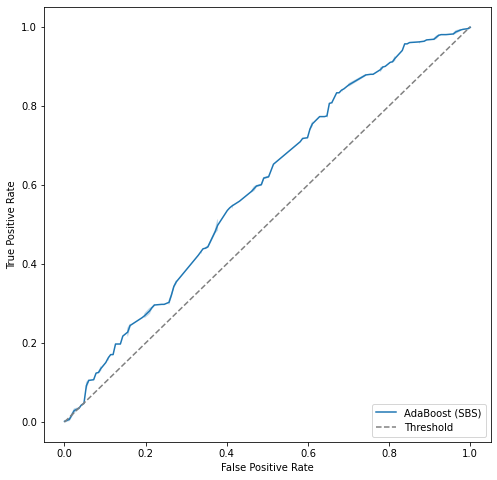

In [22]:
from sklearn.ensemble import AdaBoostClassifier
from lib.experiment_helper import prepare_data_exp_iods, print_metrics

cols_to_keep = [
  'mc_get_fator_rh_2.0',
  'mc_get_fumo_0.0',
  'mc_get_gravidez_planejada_2.0',
  'mc_get_risco_gestacional_0.0',
  'mc_mul_est_civil_1.0',
  'mc_mul_nivel_inseguranca_2.0',
  'mc_mul_qtd_gest_2.0',
  'mc_mul_tipo_const_casa_1.0',
  'mc_dae_escolaridade_2.0',
  'mc_dae_possui_horta_1.0',
  'mc_dae_rfa_2.0',
  'mc_dae_sit_moradia_1.0',
  'mc_dae_trat_agua_uso_0.0',
]
X_train, X_test, y_train, y_test, _ = prepare_data_exp_iods(df, cols_to_keep)

clf_iods_ada = AdaBoostClassifier(learning_rate=0.5, n_estimators=50)
clf_iods_ada.fit(X_train, y_train)

y_pred_iods_ada = clf_iods_ada.predict(X_test)
y_pred_proba_iods_ada = clf_iods_ada.predict_proba(X_test)
fpr_iods_ada, tpr_iods_ada, _ = roc_curve(y_test, y_pred_proba_iods_ada[:, 1])

roc_score_ada = roc_auc_score(y_test, y_pred_proba_iods_ada[:, 1])
print(f"\nROC AUC: {roc_score_ada:.4f}")

print_metrics(y_test, y_pred_iods_ada)

plot_roc_curve(tpr_iods_ada, fpr_iods_ada, 'AdaBoost (SBS)', False)

### GBM (SBS):

Starting process to convert dataframe to numpy array...
  -> Removing empty count columns
  -> Removing empty count columns
  -> Shape: (41762, 26)
  -> Applying one-hot encoding
  -> Shape after one-hot encoding: (41762, 97)
Applying undersampling...
  -> Shape after undersampling: (2327, 40)
Splitting data...
  -> Shape after splitting: train=(1861, 39) [0 = 659, 1 = 1202] | test=(466, 39) [0 = 167, 1 = 299]

ROC AUC: 0.6127
Metrics:
  -> Accuracy: 0.6502145922746781
  -> Macro avg: {'precision': 0.6017786561264822, 'recall': 0.5701339795325736, 'f1-score': 0.5642286310934156, 'support': 466}
  -> Weighted avg: {'precision': 0.6244507964511695, 'recall': 0.6502145922746781, 'f1-score': 0.619060258513351, 'support': 466}
  -> True class results: {'precision': 0.5217391304347826, 'recall': 0.2874251497005988, 'f1-score': 0.3706563706563707, 'support': 167}
  -> False class results: {'precision': 0.6818181818181818, 'recall': 0.8528428093645485, 'f1-score': 0.7578008915304605, 'support'

/opt/homebrew/Caskroom/miniforge/base/envs/syphilis-env/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


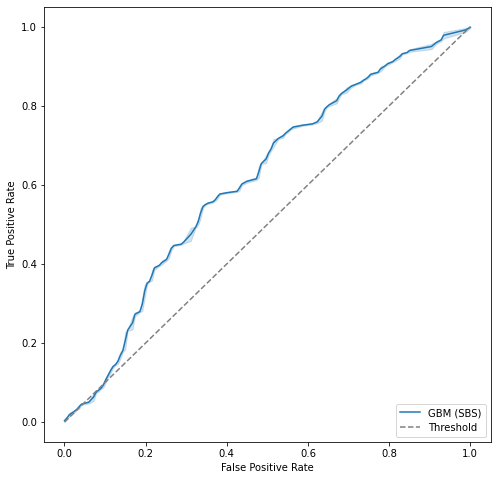

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
from lib.experiment_helper import prepare_data_exp_iods, print_metrics

cols_to_keep = [
  'mc_get_vacina_anti_tetanica',
  'idade',
  'mc_get_alcool_0.0',
  'mc_get_fator_rh_2.0',
  'mc_get_fumo_0.0',
  'mc_get_gravidez_planejada_0.0',
  'mc_get_gravidez_planejada_1.0',
  'mc_get_gravidez_planejada_2.0',
  'mc_get_grupo_sanguineo_2.0',
  'mc_mul_chefe_familia_1.0',
  'mc_mul_est_civil_1.0',
  'mc_mul_est_civil_3.0',
  'mc_mul_nivel_inseguranca_0.0',
  'mc_mul_nivel_inseguranca_2.0',
  'mc_mul_qtd_aborto_0.0',
  'mc_mul_qtd_aborto_2.0',
  'mc_mul_qtd_aborto_3.0',
  'mc_mul_qtd_filhos_vivos_1.0',
  'mc_mul_qtd_gest_1.0',
  'mc_mul_qtd_gest_2.0',
  'mc_mul_qtd_gest_3.0',
  'mc_mul_rec_inf_plan_fam_0.0',
  'mc_mul_tipo_const_casa_3.0',
  'mc_dae_escolaridade_5.0',
  'mc_dae_escolaridade_7.0',
  'mc_dae_escolaridade_9.0',
  'mc_dae_mrd_lgd_red_esg_1.0',
  'mc_dae_mrd_lgd_red_esg_2.0',
  'mc_dae_numero_res_domic_1.0',
  'mc_dae_numero_res_domic_5.0',
  'mc_dae_possui_arv_frut_1.0',
  'mc_dae_possui_horta_0.0',
  'mc_dae_rfa_2.0',
  'mc_dae_sit_moradia_0.0',
  'mc_dae_sit_moradia_2.0',
  'mc_dae_trat_agua_uso_0.0',
  'mc_dae_trat_agua_uso_1.0',
  'mc_dae_trat_agua_uso_3.0',
  'mc_dae_trat_agua_uso_4.0',
]
X_train, X_test, y_train, y_test, _ = prepare_data_exp_iods(df, cols_to_keep)

clf_iods_gbm = GradientBoostingClassifier(learning_rate=0.5, loss='deviance', n_estimators=50)
clf_iods_gbm.fit(X_train, y_train)

y_pred_iods_gbm = clf_iods_gbm.predict(X_test)
y_pred_proba_iods_gbm = clf_iods_gbm.predict_proba(X_test)
fpr_iods_gbm, tpr_iods_gbm, _ = roc_curve(y_test, y_pred_proba_iods_gbm[:, 1])

roc_score_gbm = roc_auc_score(y_test, y_pred_proba_iods_gbm[:, 1])
print(f"\nROC AUC: {roc_score_gbm:.4f}")

print_metrics(y_test, y_pred_iods_gbm)

plot_roc_curve(tpr_iods_gbm, fpr_iods_gbm, 'GBM (SBS)', False)

### XGBoost (SBS):

Starting process to convert dataframe to numpy array...
  -> Removing empty count columns
  -> Removing empty count columns
  -> Shape: (41762, 26)
  -> Applying one-hot encoding
  -> Shape after one-hot encoding: (41762, 97)
Applying undersampling...
  -> Shape after undersampling: (2327, 10)
Splitting data...
  -> Shape after splitting: train=(1861, 9) [0 = 659, 1 = 1202] | test=(466, 9) [0 = 167, 1 = 299]
[08:46:17] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/homebrew/Caskroom/miniforge/base/envs/syphilis-env/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC AUC: 0.5179
Metrics:
  -> Accuracy: 0.648068669527897
  -> Macro avg: {'precision': 0.5957804960161598, 'recall': 0.551278713476058, 'f1-score': 0.5320941395439962, 'support': 466}
  -> Weighted avg: {'precision': 0.6165697698220312, 'recall': 0.648068669527897, 'f1-score': 0.5980796479831122, 'support': 466}
  -> True class results: {'precision': 0.5223880597014925, 'recall': 0.20958083832335328, 'f1-score': 0.2991452991452991, 'support': 167}
  -> False class results: {'precision': 0.6691729323308271, 'recall': 0.8929765886287625, 'f1-score': 0.7650429799426934, 'support': 299}
  -> Confusion matrix: [[ 35 132], [ 32 267]]


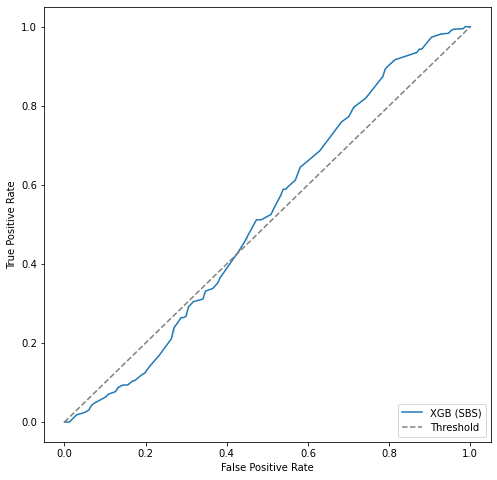

In [24]:
from xgboost import XGBClassifier
from lib.experiment_helper import prepare_data_exp_iods, print_metrics

cols_to_keep = [
  'mc_mul_renda_familiar',
  'mc_get_alcool_0.0',
  'mc_get_fumo_0.0',
  'mc_get_gravidez_planejada_0.0',
  'mc_mul_est_civil_1.0',
  'mc_mul_nivel_inseguranca_0.0',
  'mc_mul_nivel_inseguranca_1.0',
  'mc_mul_qtd_aborto_3.0',
  'mc_mul_qtd_filhos_vivos_1.0',
]
X_train, X_test, y_train, y_test, _ = prepare_data_exp_iods(df, cols_to_keep)

clf_iods_xgb = XGBClassifier(learning_rate=0.3, max_depth=5)
clf_iods_xgb.fit(X_train, y_train)

y_pred_iods_xgb = clf_iods_xgb.predict(X_test)
y_pred_proba_iods_xgb = clf_iods_xgb.predict_proba(X_test)
fpr_iods_xgb, tpr_iods_xgb, _ = roc_curve(y_test, y_pred_proba_iods_xgb[:, 1])

roc_score_xgb = roc_auc_score(y_test, y_pred_proba_iods_xgb[:, 1])
print(f"\nROC AUC: {roc_score_xgb:.4f}")

print_metrics(y_test, y_pred_iods_xgb)

plot_roc_curve(tpr_iods_xgb, fpr_iods_xgb, 'XGB (SBS)', False)

### KNN (SBS):

Starting process to convert dataframe to numpy array...
  -> Removing empty count columns
  -> Removing empty count columns
  -> Shape: (41762, 26)
  -> Applying one-hot encoding
  -> Shape after one-hot encoding: (41762, 97)
Applying undersampling...
  -> Shape after undersampling: (2327, 35)
Splitting data...
  -> Shape after splitting: train=(1861, 34) [0 = 659, 1 = 1202] | test=(466, 34) [0 = 167, 1 = 299]

ROC AUC: 0.5352
Metrics:
  -> Accuracy: 0.5793991416309013
  -> Macro avg: {'precision': 0.5132831230474899, 'recall': 0.5109847195241624, 'f1-score': 0.5056398709649483, 'support': 466}
  -> Weighted avg: {'precision': 0.5515608180168334, 'recall': 0.5793991416309013, 'f1-score': 0.5597300027866472, 'support': 466}
  -> True class results: {'precision': 0.37815126050420167, 'recall': 0.2694610778443114, 'f1-score': 0.3146853146853147, 'support': 167}
  -> False class results: {'precision': 0.6484149855907781, 'recall': 0.7525083612040134, 'f1-score': 0.6965944272445821, 'suppor

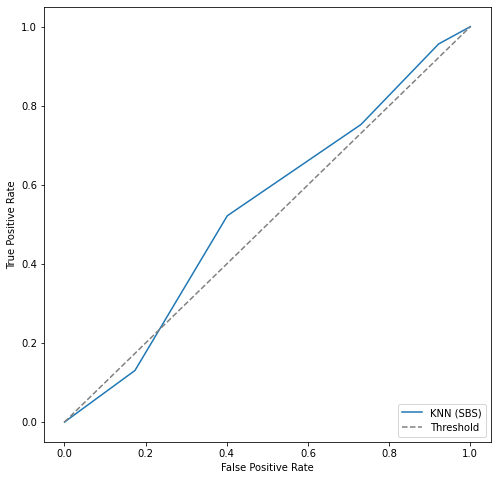

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from lib.experiment_helper import prepare_data_exp_iods, print_metrics

cols_to_keep = [
  'mc_mul_renda_familiar',
  'idade',
  'mc_get_alcool_1.0',
  'mc_get_fator_rh_0.0',
  'mc_get_fator_rh_1.0',
  'mc_get_fumo_0.0',
  'mc_get_fumo_1.0',
  'mc_get_grupo_sanguineo_1.0',
  'mc_get_grupo_sanguineo_3.0',
  'mc_get_risco_gestacional_0.0',
  'mc_get_risco_gestacional_1.0',
  'mc_get_risco_gestacional_2.0',
  'mc_mul_chefe_familia_0.0',
  'mc_mul_est_civil_0.0',
  'mc_mul_est_civil_1.0',
  'mc_mul_nivel_inseguranca_0.0',
  'mc_mul_nivel_inseguranca_1.0',
  'mc_mul_qtd_gest_1.0',
  'mc_mul_qtd_gest_2.0',
  'mc_mul_qtd_gest_4.0',
  'mc_mul_rec_inf_plan_fam_0.0',
  'mc_mul_rec_inf_plan_fam_2.0',
  'mc_dae_escolaridade_1.0',
  'mc_dae_escolaridade_2.0',
  'mc_dae_escolaridade_4.0',
  'mc_dae_escolaridade_5.0',
  'mc_dae_mrd_lgd_red_esg_0.0',
  'mc_dae_numero_res_domic_3.0',
  'mc_dae_possui_horta_2.0',
  'mc_dae_rfa_1.0',
  'mc_dae_rfa_3.0',
  'mc_dae_sit_moradia_1.0',
  'mc_dae_sit_moradia_3.0',
  'mc_dae_trat_agua_uso_2.0',
]
X_train, X_test, y_train, y_test, _ = prepare_data_exp_iods(df, cols_to_keep)

clf_iods_knn = KNeighborsClassifier(n_neighbors=5, p=1, weights='uniform')
clf_iods_knn.fit(X_train, y_train)

y_pred_iods_knn = clf_iods_knn.predict(X_test)
y_pred_proba_iods_knn = clf_iods_knn.predict_proba(X_test)
fpr_iods_knn, tpr_iods_knn, _ = roc_curve(y_test, y_pred_proba_iods_knn[:, 1])

roc_score_knn = roc_auc_score(y_test, y_pred_proba_iods_knn[:, 1])
print(f"\nROC AUC: {roc_score_knn:.4f}")

print_metrics(y_test, y_pred_iods_knn)

plot_roc_curve(tpr_iods_knn, fpr_iods_knn, 'KNN (SBS)', False)

### SVM (SBS):

Starting process to convert dataframe to numpy array...
  -> Removing empty count columns
  -> Removing empty count columns
  -> Shape: (41762, 26)
  -> Applying one-hot encoding
  -> Shape after one-hot encoding: (41762, 97)
Applying undersampling...
  -> Shape after undersampling: (2327, 26)
Splitting data...
  -> Shape after splitting: train=(1861, 25) [0 = 659, 1 = 1202] | test=(466, 25) [0 = 167, 1 = 299]

ROC AUC: 0.5970
Metrics:
  -> Accuracy: 0.6330472103004292
  -> Macro avg: {'precision': 0.56569612769731, 'recall': 0.5356077143372119, 'f1-score': 0.5135016331389847, 'support': 466}
  -> Weighted avg: {'precision': 0.5926365607385576, 'recall': 0.6330472103004292, 'f1-score': 0.581813391516953, 'support': 466}
  -> True class results: {'precision': 0.47058823529411764, 'recall': 0.19161676646706588, 'f1-score': 0.2723404255319149, 'support': 167}
  -> False class results: {'precision': 0.6608040201005025, 'recall': 0.8795986622073578, 'f1-score': 0.7546628407460545, 'support'

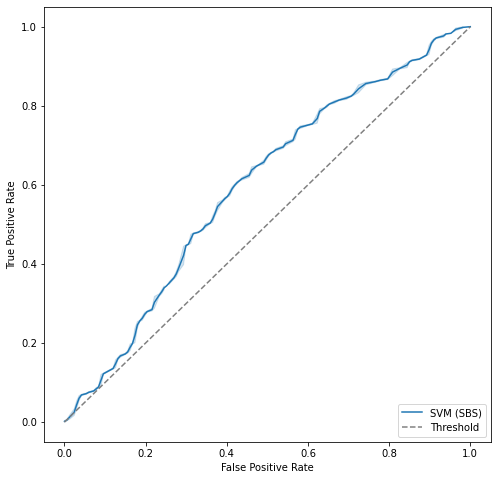

In [26]:
from sklearn.svm import SVC
from lib.experiment_helper import prepare_data_exp_iods, print_metrics

cols_to_keep = [
  'mc_get_vacina_anti_tetanica',
  'mc_get_alcool_0.0',
  'mc_get_fator_rh_2.0',
  'mc_get_fumo_0.0',
  'mc_get_fumo_1.0',
  'mc_get_gravidez_planejada_0.0',
  'mc_get_risco_gestacional_1.0',
  'mc_mul_est_civil_1.0',
  'mc_mul_est_civil_5.0',
  'mc_mul_nivel_inseguranca_0.0',
  'mc_mul_nivel_inseguranca_2.0',
  'mc_mul_qtd_aborto_2.0',
  'mc_mul_qtd_filhos_vivos_1.0',
  'mc_mul_qtd_filhos_vivos_4.0',
  'mc_mul_qtd_gest_3.0',
  'mc_mul_rec_inf_plan_fam_1.0',
  'mc_dae_escolaridade_1.0',
  'mc_dae_escolaridade_2.0',
  'mc_dae_escolaridade_5.0',
  'mc_dae_escolaridade_6.0',
  'mc_dae_numero_res_domic_3.0',
  'mc_dae_numero_res_domic_4.0',
  'mc_dae_rfa_1.0',
  'mc_dae_rfa_3.0',
  'mc_dae_trat_agua_uso_2.0',
]
X_train, X_test, y_train, y_test, _ = prepare_data_exp_iods(df, cols_to_keep)

clf_iods_svm = SVC(gamma='scale', kernel='rbf', probability=True)
clf_iods_svm.fit(X_train, y_train)

y_pred_iods_svm = clf_iods_svm.predict(X_test)
y_pred_proba_iods_svm = clf_iods_svm.predict_proba(X_test)
fpr_iods_svm, tpr_iods_svm, _ = roc_curve(y_test, y_pred_proba_iods_svm[:, 1])

roc_score_svm = roc_auc_score(y_test, y_pred_proba_iods_svm[:, 1])
print(f"\nROC AUC: {roc_score_svm:.4f}")

print_metrics(y_test, y_pred_iods_svm)

plot_roc_curve(tpr_iods_svm, fpr_iods_svm, 'SVM (SBS)', False)

### All:

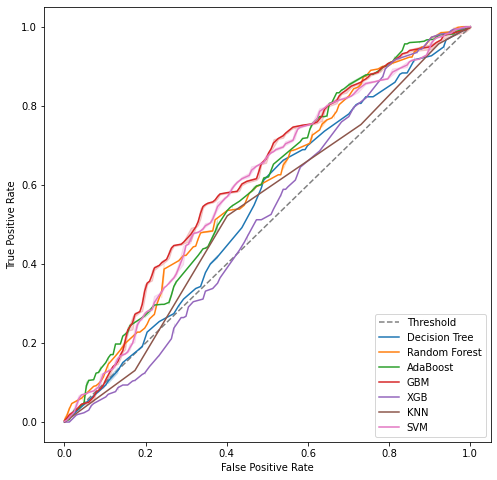

In [27]:
plt.figure(figsize = (8, 8))
ax = sns.lineplot(x = [0, 1], y = [0, 1], color = 'gray', label='Threshold')
ax.lines[0].set_linestyle('--')

sns.lineplot(x = fpr_iods_decision_tree, y = tpr_iods_decision_tree, label='Decision Tree')
sns.lineplot(x = fpr_iods_rf, y = tpr_iods_rf, label='Random Forest')
sns.lineplot(x = fpr_iods_ada, y = tpr_iods_ada, label='AdaBoost')
sns.lineplot(x = fpr_iods_gbm, y = tpr_iods_gbm, label='GBM')
sns.lineplot(x = fpr_iods_xgb, y = tpr_iods_xgb, label='XGB')
sns.lineplot(x = fpr_iods_knn, y = tpr_iods_knn, label='KNN')
sns.lineplot(x = fpr_iods_svm, y = tpr_iods_svm, label='SVM')

plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")

## BODS - Exp 4:

### Decision tree (SBS):

Starting process to convert dataframe to numpy array...
  -> Removing empty count columns
  -> Removing empty count columns
  -> Shape: (41762, 26)
  -> Applying one-hot encoding
  -> Shape after one-hot encoding: (41762, 97)
Applying undersampling...
  -> Shape after undersampling: (1652, 17)
Splitting data...
  -> Shape after splitting: train=(1321, 16) [0 = 660, 1 = 661] | test=(331, 16) [0 = 166, 1 = 165]

ROC AUC: 0.5619
Metrics:
  -> Accuracy: 0.5589123867069486
  -> Macro avg: {'precision': 0.5612595419847328, 'recall': 0.5585980284775466, 'f1-score': 0.5539248264658101, 'support': 331}
  -> Weighted avg: {'precision': 0.5612255252415767, 'recall': 0.5589123867069486, 'f1-score': 0.5540673281869855, 'support': 331}
  -> True class results: {'precision': 0.55, 'recall': 0.6626506024096386, 'f1-score': 0.6010928961748634, 'support': 166}
  -> False class results: {'precision': 0.5725190839694656, 'recall': 0.45454545454545453, 'f1-score': 0.5067567567567567, 'support': 165}
  -> C

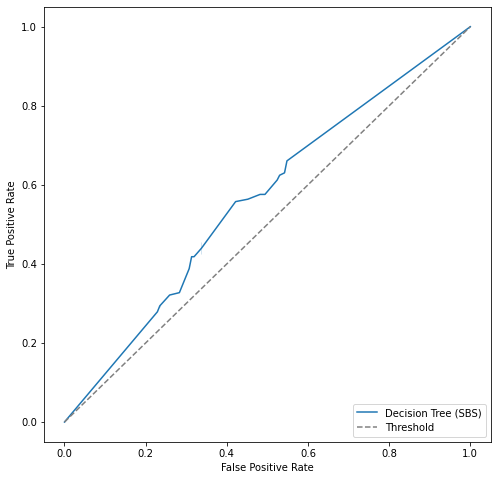

In [28]:
from sklearn.tree import DecisionTreeClassifier
from lib.experiment_helper import prepare_data_exp_bods, print_metrics

cols_to_keep = [
  'mc_get_fator_rh_2.0',
  'mc_get_fumo_0.0',
  'mc_get_grupo_sanguineo_0.0',
  'mc_get_grupo_sanguineo_2.0',
  'mc_get_risco_gestacional_0.0',
  'mc_mul_est_civil_0.0',
  'mc_mul_est_civil_1.0',
  'mc_mul_nivel_inseguranca_0.0',
  'mc_mul_nivel_inseguranca_2.0',
  'mc_mul_rec_inf_plan_fam_1.0',
  'mc_dae_escolaridade_2.0',
  'mc_dae_numero_res_domic_2.0',
  'mc_dae_sit_moradia_0.0',
  'mc_dae_sit_moradia_1.0',
  'mc_dae_trat_agua_uso_0.0',
  'mc_dae_trat_agua_uso_3.0',
]
X_train, X_test, y_train, y_test, _ = prepare_data_exp_bods(df, cols_to_keep)

clf_bods_decision_tree = DecisionTreeClassifier(criterion='gini', splitter='best')
clf_bods_decision_tree.fit(X_train, y_train)

y_pred_bods_decision_tree = clf_bods_decision_tree.predict(X_test)
y_pred_proba_bods_decision_tree = clf_bods_decision_tree.predict_proba(X_test)
fpr_bods_decision_tree, tpr_bods_decision_tree, _ = roc_curve(y_test, y_pred_proba_bods_decision_tree[:, 1])

roc_score_decision_tree = roc_auc_score(y_test, y_pred_proba_bods_decision_tree[:, 1])
print(f"\nROC AUC: {roc_score_decision_tree:.4f}")

print_metrics(y_test, y_pred_bods_decision_tree)

plot_roc_curve(tpr_bods_decision_tree, fpr_bods_decision_tree, 'Decision Tree (SBS)', False)

### Random forest (SFS):

Starting process to convert dataframe to numpy array...
  -> Removing empty count columns
  -> Removing empty count columns
  -> Shape: (41762, 26)
  -> Applying one-hot encoding
  -> Shape after one-hot encoding: (41762, 97)
Applying undersampling...
  -> Shape after undersampling: (1652, 29)
Splitting data...
  -> Shape after splitting: train=(1321, 28) [0 = 660, 1 = 661] | test=(331, 28) [0 = 166, 1 = 165]

ROC AUC: 0.5545
Metrics:
  -> Accuracy: 0.5498489425981873
  -> Macro avg: {'precision': 0.5498393456988462, 'recall': 0.5498357064622125, 'f1-score': 0.5498325072793158, 'support': 331}
  -> Weighted avg: {'precision': 0.5498425446652934, 'recall': 0.5498489425981873, 'f1-score': 0.5498407249387516, 'support': 331}
  -> True class results: {'precision': 0.5508982035928144, 'recall': 0.5542168674698795, 'f1-score': 0.5525525525525525, 'support': 166}
  -> False class results: {'precision': 0.5487804878048781, 'recall': 0.5454545454545454, 'f1-score': 0.547112462006079, 'support':

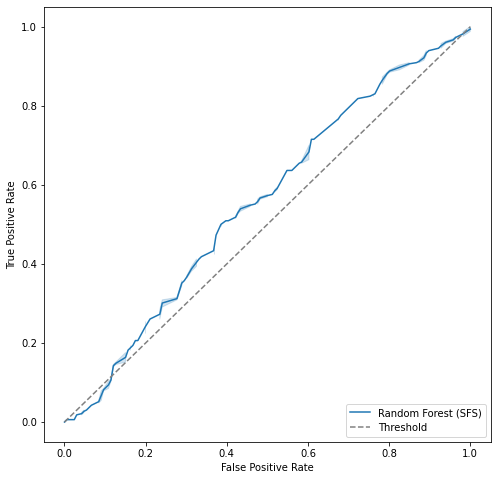

In [29]:
from sklearn.ensemble import RandomForestClassifier
from lib.experiment_helper import prepare_data_exp_bods, print_metrics

cols_to_keep = [
  'mc_get_alcool_2.0',
  'mc_get_fumo_1.0',
  'mc_get_fumo_2.0',
  'mc_get_gravidez_planejada_0.0',
  'mc_get_gravidez_planejada_1.0',
  'mc_get_grupo_sanguineo_2.0',
  'mc_get_grupo_sanguineo_3.0',
  'mc_get_risco_gestacional_0.0',
  'mc_get_risco_gestacional_1.0',
  'mc_get_risco_gestacional_2.0',
  'mc_mul_est_civil_1.0',
  'mc_mul_est_civil_2.0',
  'mc_mul_est_civil_4.0',
  'mc_mul_nivel_inseguranca_0.0',
  'mc_mul_qtd_aborto_1.0',
  'mc_mul_tipo_const_casa_0.0',
  'mc_mul_tipo_const_casa_1.0',
  'mc_mul_tipo_const_casa_2.0',
  'mc_mul_tipo_const_casa_3.0',
  'mc_dae_escolaridade_0.0',
  'mc_dae_escolaridade_5.0',
  'mc_dae_escolaridade_7.0',
  'mc_dae_escolaridade_8.0',
  'mc_dae_numero_res_domic_0.0',
  'mc_dae_numero_res_domic_1.0',
  'mc_dae_possui_horta_0.0',
  'mc_dae_rfa_1.0',
  'mc_dae_sit_moradia_2.0',
]
X_train, X_test, y_train, y_test, _ = prepare_data_exp_bods(df, cols_to_keep)

clf_bods_rf = RandomForestClassifier(criterion='gini', n_estimators=150)
clf_bods_rf.fit(X_train, y_train)

y_pred_bods_rf = clf_bods_rf.predict(X_test)
y_pred_proba_bods_rf = clf_bods_rf.predict_proba(X_test)
fpr_bods_rf, tpr_bods_rf, _ = roc_curve(y_test, y_pred_proba_bods_rf[:, 1])

roc_score_rf = roc_auc_score(y_test, y_pred_proba_bods_rf[:, 1])
print(f"\nROC AUC: {roc_score_rf:.4f}")

print_metrics(y_test, y_pred_bods_rf)

plot_roc_curve(tpr_bods_rf, fpr_bods_rf, 'Random Forest (SFS)', False)

### AdaBoost (SBS):

Starting process to convert dataframe to numpy array...
  -> Removing empty count columns
  -> Removing empty count columns
  -> Shape: (41762, 26)
  -> Applying one-hot encoding
  -> Shape after one-hot encoding: (41762, 97)
Applying undersampling...
  -> Shape after undersampling: (1652, 22)
Splitting data...
  -> Shape after splitting: train=(1321, 21) [0 = 660, 1 = 661] | test=(331, 21) [0 = 166, 1 = 165]

ROC AUC: 0.6097
Metrics:
  -> Accuracy: 0.5649546827794562
  -> Macro avg: {'precision': 0.5657767890248424, 'recall': 0.5647681635633444, 'f1-score': 0.5631964809384165, 'support': 331}
  -> Weighted avg: {'precision': 0.5657567376530037, 'recall': 0.5649546827794562, 'f1-score': 0.5632802048356088, 'support': 331}
  -> True class results: {'precision': 0.5591397849462365, 'recall': 0.6265060240963856, 'f1-score': 0.5909090909090908, 'support': 166}
  -> False class results: {'precision': 0.5724137931034483, 'recall': 0.503030303030303, 'f1-score': 0.535483870967742, 'support': 

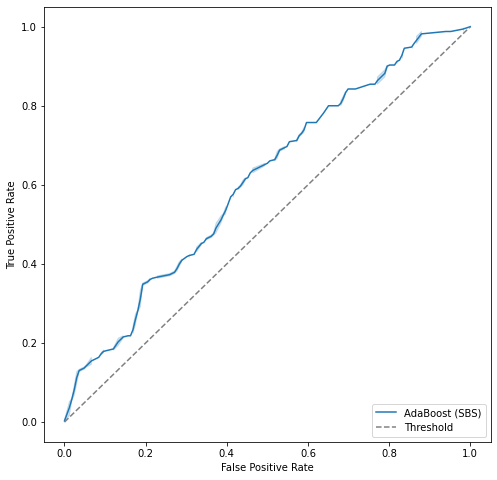

In [30]:
from sklearn.ensemble import AdaBoostClassifier
from lib.experiment_helper import prepare_data_exp_bods, print_metrics

cols_to_keep = [
  'mc_get_vacina_anti_tetanica',
  'mc_get_fumo_0.0',
  'mc_get_fumo_1.0',
  'mc_get_gravidez_planejada_1.0',
  'mc_get_risco_gestacional_0.0',
  'mc_mul_est_civil_1.0',
  'mc_mul_est_civil_3.0',
  'mc_mul_est_civil_5.0',
  'mc_mul_nivel_inseguranca_0.0',
  'mc_mul_nivel_inseguranca_2.0',
  'mc_mul_qtd_aborto_0.0',
  'mc_mul_qtd_gest_2.0',
  'mc_mul_tipo_const_casa_1.0',
  'mc_dae_escolaridade_5.0',
  'mc_dae_escolaridade_7.0',
  'mc_dae_escolaridade_8.0',
  'mc_dae_escolaridade_9.0',
  'mc_dae_numero_res_domic_2.0',
  'mc_dae_possui_arv_frut_0.0',
  'mc_dae_possui_horta_0.0',
  'mc_dae_trat_agua_uso_1.0',
]
X_train, X_test, y_train, y_test, _ = prepare_data_exp_bods(df, cols_to_keep)

clf_bods_ada = AdaBoostClassifier(learning_rate=0.5, n_estimators=50)
clf_bods_ada.fit(X_train, y_train)

y_pred_bods_ada = clf_bods_ada.predict(X_test)
y_pred_proba_bods_ada = clf_bods_ada.predict_proba(X_test)
fpr_bods_ada, tpr_bods_ada, _ = roc_curve(y_test, y_pred_proba_bods_ada[:, 1])

roc_score_ada = roc_auc_score(y_test, y_pred_proba_bods_ada[:, 1])
print(f"\nROC AUC: {roc_score_ada:.4f}")

print_metrics(y_test, y_pred_bods_ada)

plot_roc_curve(tpr_bods_ada, fpr_bods_ada, 'AdaBoost (SBS)', False)

### GBM (SFS):

Starting process to convert dataframe to numpy array...
  -> Removing empty count columns
  -> Removing empty count columns
  -> Shape: (41762, 26)
  -> Applying one-hot encoding
  -> Shape after one-hot encoding: (41762, 97)
Applying undersampling...
  -> Shape after undersampling: (1652, 32)
Splitting data...
  -> Shape after splitting: train=(1321, 31) [0 = 660, 1 = 661] | test=(331, 31) [0 = 166, 1 = 165]

ROC AUC: 0.5740
Metrics:
  -> Accuracy: 0.5740181268882175
  -> Macro avg: {'precision': 0.5746935460050213, 'recall': 0.5738590726542534, 'f1-score': 0.5727546527275558, 'support': 331}
  -> Weighted avg: {'precision': 0.5746742483159698, 'recall': 0.5740181268882175, 'f1-score': 0.5728248457364814, 'support': 331}
  -> True class results: {'precision': 0.5683060109289617, 'recall': 0.6265060240963856, 'f1-score': 0.5959885386819485, 'support': 166}
  -> False class results: {'precision': 0.581081081081081, 'recall': 0.5212121212121212, 'f1-score': 0.549520766773163, 'support': 

/opt/homebrew/Caskroom/miniforge/base/envs/syphilis-env/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


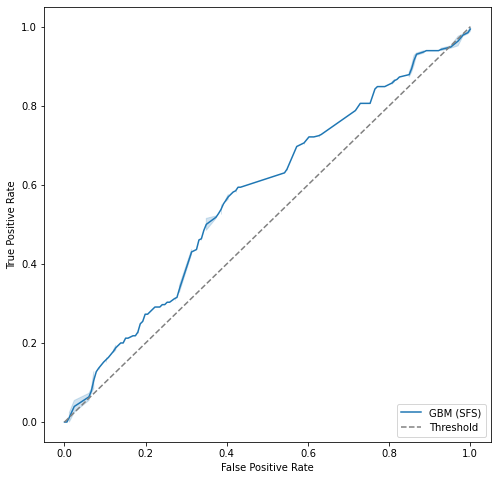

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
from lib.experiment_helper import prepare_data_exp_bods, print_metrics

cols_to_keep = [
  'mc_get_alcool_2.0',
  'mc_get_fumo_1.0',
  'mc_get_fumo_2.0',
  'mc_get_gravidez_planejada_2.0',
  'mc_get_risco_gestacional_2.0',
  'mc_mul_est_civil_1.0',
  'mc_mul_est_civil_2.0',
  'mc_mul_est_civil_3.0',
  'mc_mul_nivel_inseguranca_0.0',
  'mc_mul_nivel_inseguranca_1.0',
  'mc_mul_nivel_inseguranca_2.0',
  'mc_mul_tipo_const_casa_1.0',
  'mc_mul_tipo_const_casa_3.0',
  'mc_mul_tipo_const_casa_4.0',
  'mc_dae_escolaridade_0.0',
  'mc_dae_escolaridade_7.0',
  'mc_dae_escolaridade_8.0',
  'mc_dae_escolaridade_9.0',
  'mc_dae_numero_res_domic_0.0',
  'mc_dae_numero_res_domic_5.0',
  'mc_dae_possui_arv_frut_0.0',
  'mc_dae_possui_arv_frut_1.0',
  'mc_dae_possui_arv_frut_2.0',
  'mc_dae_possui_horta_0.0',
  'mc_dae_possui_horta_1.0',
  'mc_dae_possui_horta_2.0',
  'mc_dae_rfa_1.0',
  'mc_dae_rfa_2.0',
  'mc_dae_sit_moradia_2.0',
  'mc_dae_trat_agua_uso_1.0',
  'mc_dae_trat_agua_uso_3.0',
]
X_train, X_test, y_train, y_test, _ = prepare_data_exp_bods(df, cols_to_keep)

clf_bods_gbm = GradientBoostingClassifier(learning_rate=0.5, loss='deviance', n_estimators=100)
clf_bods_gbm.fit(X_train, y_train)

y_pred_bods_gbm = clf_bods_gbm.predict(X_test)
y_pred_proba_bods_gbm = clf_bods_gbm.predict_proba(X_test)
fpr_bods_gbm, tpr_bods_gbm, _ = roc_curve(y_test, y_pred_proba_bods_gbm[:, 1])

roc_score_gbm = roc_auc_score(y_test, y_pred_proba_bods_gbm[:, 1])
print(f"\nROC AUC: {roc_score_gbm:.4f}")

print_metrics(y_test, y_pred_bods_gbm)

plot_roc_curve(tpr_bods_gbm, fpr_bods_gbm, 'GBM (SFS)', False)

### XGBoost (SFS):

Starting process to convert dataframe to numpy array...
  -> Removing empty count columns
  -> Removing empty count columns
  -> Shape: (41762, 26)
  -> Applying one-hot encoding
  -> Shape after one-hot encoding: (41762, 97)
Applying undersampling...
  -> Shape after undersampling: (1652, 24)
Splitting data...
  -> Shape after splitting: train=(1321, 23) [0 = 660, 1 = 661] | test=(331, 23) [0 = 166, 1 = 165]
[08:46:23] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/homebrew/Caskroom/miniforge/base/envs/syphilis-env/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC AUC: 0.5710
Metrics:
  -> Accuracy: 0.56797583081571
  -> Macro avg: {'precision': 0.568000730994152, 'recall': 0.5679262504563709, 'f1-score': 0.5678338278931752, 'support': 331}
  -> Weighted avg: {'precision': 0.5679984673415664, 'recall': 0.56797583081571, 'f1-score': 0.567857495046931, 'support': 331}
  -> True class results: {'precision': 0.5672514619883041, 'recall': 0.5843373493975904, 'f1-score': 0.5756676557863502, 'support': 166}
  -> False class results: {'precision': 0.56875, 'recall': 0.5515151515151515, 'f1-score': 0.56, 'support': 165}
  -> Confusion matrix: [[97 69], [74 91]]


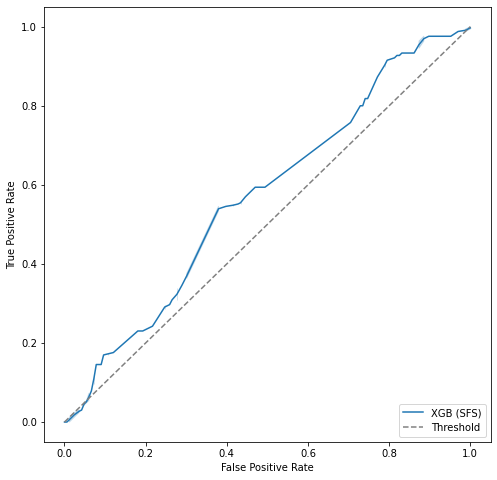

In [32]:
from xgboost import XGBClassifier
from lib.experiment_helper import prepare_data_exp_bods, print_metrics

cols_to_keep = [
  'mc_get_fumo_0.0',
  'mc_get_fumo_1.0',
  'mc_get_fumo_2.0',
  'mc_get_grupo_sanguineo_2.0',
  'mc_get_grupo_sanguineo_3.0',
  'mc_get_risco_gestacional_2.0',
  'mc_mul_est_civil_1.0',
  'mc_mul_est_civil_2.0',
  'mc_mul_est_civil_3.0',
  'mc_mul_est_civil_4.0',
  'mc_mul_nivel_inseguranca_0.0',
  'mc_mul_qtd_filhos_vivos_2.0',
  'mc_mul_tipo_const_casa_0.0',
  'mc_mul_tipo_const_casa_3.0',
  'mc_dae_escolaridade_0.0',
  'mc_dae_escolaridade_8.0',
  'mc_dae_escolaridade_9.0',
  'mc_dae_numero_res_domic_0.0',
  'mc_dae_numero_res_domic_1.0',
  'mc_dae_possui_arv_frut_0.0',
  'mc_dae_rfa_2.0',
  'mc_dae_trat_agua_uso_1.0',
  'mc_dae_trat_agua_uso_3.0',
]
X_train, X_test, y_train, y_test, _ = prepare_data_exp_bods(df, cols_to_keep)

clf_bods_xgb = XGBClassifier(learning_rate=0.3, max_depth=5)
clf_bods_xgb.fit(X_train, y_train)

y_pred_bods_xgb = clf_bods_xgb.predict(X_test)
y_pred_proba_bods_xgb = clf_bods_xgb.predict_proba(X_test)
fpr_bods_xgb, tpr_bods_xgb, _ = roc_curve(y_test, y_pred_proba_bods_xgb[:, 1])

roc_score_xgb = roc_auc_score(y_test, y_pred_proba_bods_xgb[:, 1])
print(f"\nROC AUC: {roc_score_xgb:.4f}")

print_metrics(y_test, y_pred_bods_xgb)

plot_roc_curve(tpr_bods_xgb, fpr_bods_xgb, 'XGB (SFS)', False)

### KNN (SBS):

Starting process to convert dataframe to numpy array...
  -> Removing empty count columns
  -> Removing empty count columns
  -> Shape: (41762, 26)
  -> Applying one-hot encoding
  -> Shape after one-hot encoding: (41762, 97)
Applying undersampling...
  -> Shape after undersampling: (1652, 52)
Splitting data...
  -> Shape after splitting: train=(1321, 51) [0 = 660, 1 = 661] | test=(331, 51) [0 = 166, 1 = 165]

ROC AUC: 0.5947
Metrics:
  -> Accuracy: 0.5861027190332326
  -> Macro avg: {'precision': 0.5865554248750368, 'recall': 0.5859802847754655, 'f1-score': 0.585360947286609, 'support': 331}
  -> Weighted avg: {'precision': 0.586538657992007, 'recall': 0.5861027190332326, 'f1-score': 0.5854139309827965, 'support': 331}
  -> True class results: {'precision': 0.5810055865921788, 'recall': 0.6265060240963856, 'f1-score': 0.6028985507246377, 'support': 166}
  -> False class results: {'precision': 0.5921052631578947, 'recall': 0.5454545454545454, 'f1-score': 0.5678233438485805, 'support': 

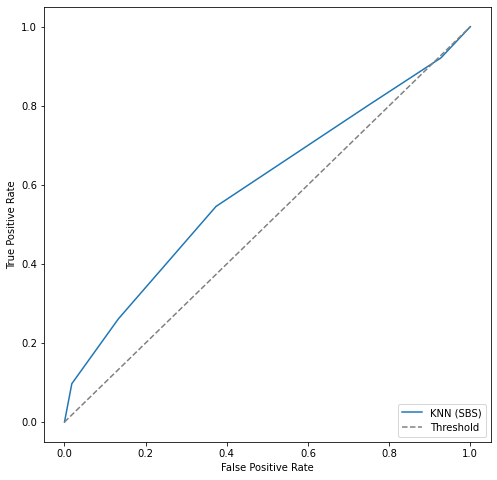

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from lib.experiment_helper import prepare_data_exp_bods, print_metrics

cols_to_keep = [
  'mc_get_vacina_anti_tetanica',
  'mc_mul_renda_familiar',
  'idade',
  'mc_get_alcool_1.0',
  'mc_get_alcool_2.0',
  'mc_get_fator_rh_0.0',
  'mc_get_fumo_0.0',
  'mc_get_fumo_1.0',
  'mc_get_gravidez_planejada_0.0',
  'mc_get_gravidez_planejada_1.0',
  'mc_get_gravidez_planejada_2.0',
  'mc_get_grupo_sanguineo_1.0',
  'mc_get_grupo_sanguineo_3.0',
  'mc_get_grupo_sanguineo_4.0',
  'mc_get_risco_gestacional_0.0',
  'mc_get_risco_gestacional_1.0',
  'mc_mul_chefe_familia_0.0',
  'mc_mul_chefe_familia_1.0',
  'mc_mul_est_civil_1.0',
  'mc_mul_est_civil_5.0',
  'mc_mul_nivel_inseguranca_0.0',
  'mc_mul_nivel_inseguranca_1.0',
  'mc_mul_nivel_inseguranca_2.0',
  'mc_mul_qtd_aborto_1.0',
  'mc_mul_qtd_aborto_2.0',
  'mc_mul_qtd_filhos_vivos_0.0',
  'mc_mul_qtd_filhos_vivos_1.0',
  'mc_mul_qtd_filhos_vivos_4.0',
  'mc_mul_qtd_gest_4.0',
  'mc_mul_rec_inf_plan_fam_0.0',
  'mc_mul_rec_inf_plan_fam_1.0',
  'mc_mul_rec_inf_plan_fam_2.0',
  'mc_mul_tipo_const_casa_4.0',
  'mc_dae_escolaridade_1.0',
  'mc_dae_escolaridade_2.0',
  'mc_dae_escolaridade_5.0',
  'mc_dae_escolaridade_7.0',
  'mc_dae_escolaridade_9.0',
  'mc_dae_mrd_lgd_red_esg_0.0',
  'mc_dae_mrd_lgd_red_esg_2.0',
  'mc_dae_numero_res_domic_5.0',
  'mc_dae_possui_arv_frut_0.0',
  'mc_dae_possui_horta_0.0',
  'mc_dae_possui_horta_2.0',
  'mc_dae_rfa_0.0',
  'mc_dae_rfa_2.0',
  'mc_dae_rfa_3.0',
  'mc_dae_sit_moradia_0.0',
  'mc_dae_sit_moradia_2.0',
  'mc_dae_trat_agua_uso_2.0',
  'mc_dae_trat_agua_uso_4.0',
]
X_train, X_test, y_train, y_test, _ = prepare_data_exp_bods(df, cols_to_keep)

clf_bods_knn = KNeighborsClassifier(n_neighbors=5, p=1, weights='uniform')
clf_bods_knn.fit(X_train, y_train)

y_pred_bods_knn = clf_bods_knn.predict(X_test)
y_pred_proba_bods_knn = clf_bods_knn.predict_proba(X_test)
fpr_bods_knn, tpr_bods_knn, _ = roc_curve(y_test, y_pred_proba_bods_knn[:, 1])

roc_score_knn = roc_auc_score(y_test, y_pred_proba_bods_knn[:, 1])
print(f"\nROC AUC: {roc_score_knn:.4f}")

print_metrics(y_test, y_pred_bods_knn)

plot_roc_curve(tpr_bods_knn, fpr_bods_knn, 'KNN (SBS)', False)

### SVM (SBS):

Starting process to convert dataframe to numpy array...
  -> Removing empty count columns
  -> Removing empty count columns
  -> Shape: (41762, 26)
  -> Applying one-hot encoding
  -> Shape after one-hot encoding: (41762, 97)
Applying undersampling...
  -> Shape after undersampling: (1652, 38)
Splitting data...
  -> Shape after splitting: train=(1321, 37) [0 = 660, 1 = 661] | test=(331, 37) [0 = 166, 1 = 165]

ROC AUC: 0.6113
Metrics:
  -> Accuracy: 0.5921450151057401
  -> Macro avg: {'precision': 0.5923626373626374, 'recall': 0.5920591456736035, 'f1-score': 0.5917724120919778, 'support': 331}
  -> Weighted avg: {'precision': 0.5923511835596428, 'recall': 0.5921450151057401, 'f1-score': 0.5918096723933541, 'support': 331}
  -> True class results: {'precision': 0.5885714285714285, 'recall': 0.6204819277108434, 'f1-score': 0.6041055718475072, 'support': 166}
  -> False class results: {'precision': 0.5961538461538461, 'recall': 0.5636363636363636, 'f1-score': 0.5794392523364486, 'support'

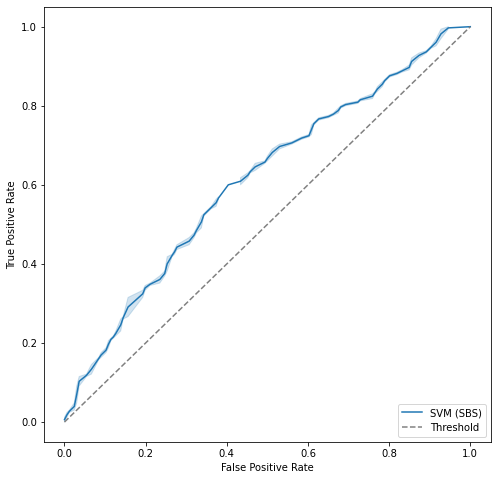

In [34]:
from sklearn.svm import SVC
from lib.experiment_helper import prepare_data_exp_bods, print_metrics

cols_to_keep = [
  'mc_get_vacina_anti_tetanica',
  'mc_get_fumo_0.0',
  'mc_get_fumo_1.0',
  'mc_get_gravidez_planejada_0.0',
  'mc_get_gravidez_planejada_1.0',
  'mc_get_grupo_sanguineo_1.0',
  'mc_get_grupo_sanguineo_4.0',
  'mc_get_risco_gestacional_0.0',
  'mc_get_risco_gestacional_1.0',
  'mc_mul_chefe_familia_1.0',
  'mc_mul_est_civil_0.0',
  'mc_mul_est_civil_1.0',
  'mc_mul_est_civil_5.0',
  'mc_mul_nivel_inseguranca_0.0',
  'mc_mul_nivel_inseguranca_2.0',
  'mc_mul_qtd_aborto_0.0',
  'mc_mul_qtd_aborto_1.0',
  'mc_mul_qtd_aborto_3.0',
  'mc_mul_qtd_gest_1.0',
  'mc_mul_rec_inf_plan_fam_0.0',
  'mc_mul_rec_inf_plan_fam_1.0',
  'mc_mul_tipo_const_casa_4.0',
  'mc_dae_escolaridade_2.0',
  'mc_dae_escolaridade_5.0',
  'mc_dae_mrd_lgd_red_esg_1.0',
  'mc_dae_numero_res_domic_3.0',
  'mc_dae_possui_arv_frut_0.0',
  'mc_dae_possui_arv_frut_1.0',
  'mc_dae_possui_horta_0.0',
  'mc_dae_possui_horta_1.0',
  'mc_dae_rfa_0.0',
  'mc_dae_rfa_3.0',
  'mc_dae_sit_moradia_0.0',
  'mc_dae_sit_moradia_1.0',
  'mc_dae_sit_moradia_2.0',
  'mc_dae_trat_agua_uso_0.0',
  'mc_dae_trat_agua_uso_2.0',
]
X_train, X_test, y_train, y_test, _ = prepare_data_exp_bods(df, cols_to_keep)

clf_bods_svm = SVC(gamma='scale', kernel='rbf', probability=True)
clf_bods_svm.fit(X_train, y_train)

y_pred_bods_svm = clf_bods_svm.predict(X_test)
y_pred_proba_bods_svm = clf_bods_svm.predict_proba(X_test)
fpr_bods_svm, tpr_bods_svm, _ = roc_curve(y_test, y_pred_proba_bods_svm[:, 1])

roc_score_svm = roc_auc_score(y_test, y_pred_proba_bods_svm[:, 1])
print(f"\nROC AUC: {roc_score_svm:.4f}")

print_metrics(y_test, y_pred_bods_svm)

plot_roc_curve(tpr_bods_svm, fpr_bods_svm, 'SVM (SBS)', False)

### All:

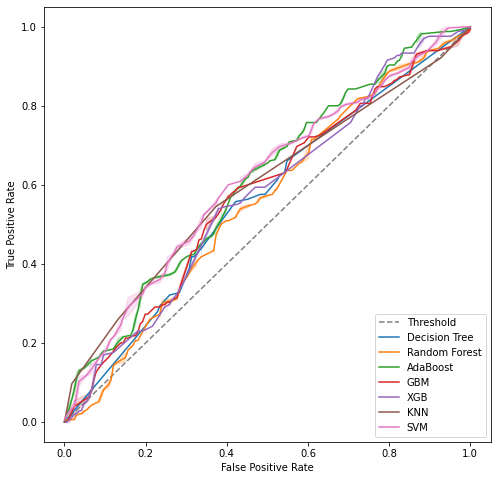

In [35]:
plt.figure(figsize = (8, 8))
ax = sns.lineplot(x = [0, 1], y = [0, 1], color = 'gray', label='Threshold')
ax.lines[0].set_linestyle('--')

sns.lineplot(x = fpr_bods_decision_tree, y = tpr_bods_decision_tree, label='Decision Tree')
sns.lineplot(x = fpr_bods_rf, y = tpr_bods_rf, label='Random Forest')
sns.lineplot(x = fpr_bods_ada, y = tpr_bods_ada, label='AdaBoost')
sns.lineplot(x = fpr_bods_gbm, y = tpr_bods_gbm, label='GBM')
sns.lineplot(x = fpr_bods_xgb, y = tpr_bods_xgb, label='XGB')
sns.lineplot(x = fpr_bods_knn, y = tpr_bods_knn, label='KNN')
sns.lineplot(x = fpr_bods_svm, y = tpr_bods_svm, label='SVM')

plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")

## IODDS - Exp 5:

### Decision tree (SBS):

Starting process to convert dataframe to numpy array...
  -> Removing empty count columns
  -> Removing empty count columns
  -> Shape: (41762, 26)
  -> Applying one-hot encoding
  -> Shape after one-hot encoding: (41762, 97)
  -> Shape after drop dummy columns: (41762, 75)
Applying undersampling...
  -> Shape after undersampling: (2327, 6)
Splitting data...
  -> Shape after splitting: train=(1861, 5) [0 = 659, 1 = 1202] | test=(466, 5) [0 = 167, 1 = 299]

ROC AUC: 0.6002
Metrics:
  -> Accuracy: 0.6609442060085837
  -> Macro avg: {'precision': 0.6225206215231153, 'recall': 0.563955700638856, 'f1-score': 0.5466256157635467, 'support': 466}
  -> Weighted avg: {'precision': 0.6376156011424065, 'recall': 0.6609442060085837, 'f1-score': 0.6111130256453624, 'support': 466}
  -> True class results: {'precision': 0.5692307692307692, 'recall': 0.2215568862275449, 'f1-score': 0.3189655172413793, 'support': 167}
  -> False class results: {'precision': 0.6758104738154613, 'recall': 0.9063545150501

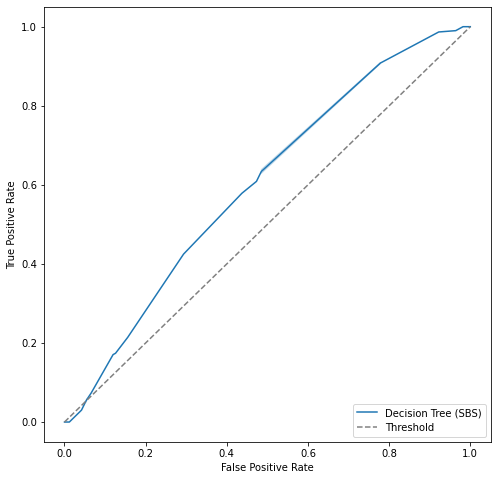

In [36]:
from sklearn.tree import DecisionTreeClassifier
from lib.experiment_helper import prepare_data_exp_iodds, print_metrics

cols_to_keep = [
  'mc_get_fumo_0.0',
  'mc_mul_nivel_inseguranca_0.0',
  'mc_dae_escolaridade_5.0',
  'mc_dae_possui_horta_0.0',
  'mc_dae_sit_moradia_1.0',
]
X_train, X_test, y_train, y_test, _ = prepare_data_exp_iodds(df, cols_to_keep)

clf_iodds_decision_tree = DecisionTreeClassifier(criterion='gini', splitter='best')
clf_iodds_decision_tree.fit(X_train, y_train)

y_pred_iodds_decision_tree = clf_iodds_decision_tree.predict(X_test)
y_pred_proba_iodds_decision_tree = clf_iodds_decision_tree.predict_proba(X_test)
fpr_iodds_decision_tree, tpr_iodds_decision_tree, _ = roc_curve(y_test, y_pred_proba_iodds_decision_tree[:, 1])

roc_score_decision_tree = roc_auc_score(y_test, y_pred_proba_iodds_decision_tree[:, 1])
print(f"\nROC AUC: {roc_score_decision_tree:.4f}")

print_metrics(y_test, y_pred_iodds_decision_tree)

plot_roc_curve(tpr_iodds_decision_tree, fpr_iodds_decision_tree, 'Decision Tree (SBS)', False)

### Random forest (SBS):

Starting process to convert dataframe to numpy array...
  -> Removing empty count columns
  -> Removing empty count columns
  -> Shape: (41762, 26)
  -> Applying one-hot encoding
  -> Shape after one-hot encoding: (41762, 97)
  -> Shape after drop dummy columns: (41762, 75)
Applying undersampling...
  -> Shape after undersampling: (2327, 39)
Splitting data...
  -> Shape after splitting: train=(1861, 38) [0 = 659, 1 = 1202] | test=(466, 38) [0 = 167, 1 = 299]

ROC AUC: 0.5822
Metrics:
  -> Accuracy: 0.6566523605150214
  -> Macro avg: {'precision': 0.6122146788478193, 'recall': 0.5804377866340897, 'f1-score': 0.5772092179277808, 'support': 466}
  -> Weighted avg: {'precision': 0.6337800243627851, 'recall': 0.6566523605150214, 'f1-score': 0.6291225586283539, 'support': 466}
  -> True class results: {'precision': 0.5360824742268041, 'recall': 0.31137724550898205, 'f1-score': 0.3939393939393939, 'support': 167}
  -> False class results: {'precision': 0.6883468834688347, 'recall': 0.84949832

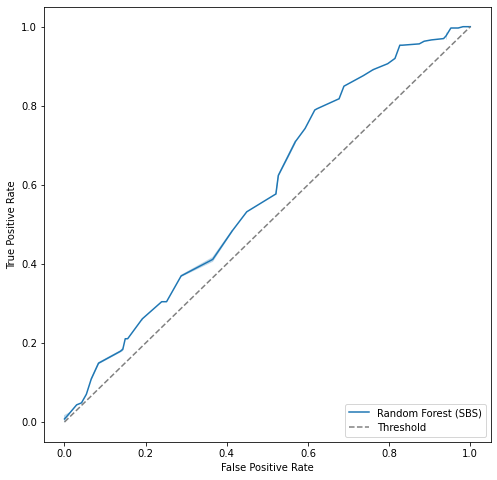

In [37]:
from sklearn.ensemble import RandomForestClassifier
from lib.experiment_helper import prepare_data_exp_iodds, print_metrics

cols_to_keep = [
  'mc_mul_renda_familiar',
  'idade',
  'mc_get_fator_rh_1.0',
  'mc_get_fumo_0.0',
  'mc_get_grupo_sanguineo_1.0',
  'mc_get_grupo_sanguineo_3.0',
  'mc_get_risco_gestacional_0.0',
  'mc_get_risco_gestacional_1.0',
  'mc_mul_chefe_familia_0.0',
  'mc_mul_est_civil_0.0',
  'mc_mul_est_civil_1.0',
  'mc_mul_est_civil_3.0',
  'mc_mul_est_civil_4.0',
  'mc_mul_nivel_inseguranca_0.0',
  'mc_mul_qtd_filhos_vivos_0.0',
  'mc_mul_qtd_filhos_vivos_1.0',
  'mc_mul_qtd_gest_1.0',
  'mc_mul_qtd_gest_3.0',
  'mc_mul_rec_inf_plan_fam_0.0',
  'mc_mul_tipo_const_casa_1.0',
  'mc_dae_escolaridade_2.0',
  'mc_dae_escolaridade_4.0',
  'mc_dae_escolaridade_5.0',
  'mc_dae_escolaridade_6.0',
  'mc_dae_escolaridade_7.0',
  'mc_dae_escolaridade_8.0',
  'mc_dae_mrd_lgd_red_esg_0.0',
  'mc_dae_numero_res_domic_1.0',
  'mc_dae_possui_arv_frut_1.0',
  'mc_dae_possui_horta_0.0',
  'mc_dae_possui_horta_1.0',
  'mc_dae_rfa_0.0',
  'mc_dae_rfa_1.0',
  'mc_dae_rfa_2.0',
  'mc_dae_sit_moradia_0.0',
  'mc_dae_sit_moradia_2.0',
  'mc_dae_trat_agua_uso_1.0',
  'mc_dae_trat_agua_uso_2.0',
]
X_train, X_test, y_train, y_test, _ = prepare_data_exp_iodds(df, cols_to_keep)

clf_iodds_rf = RandomForestClassifier(criterion='entropy', n_estimators=50)
clf_iodds_rf.fit(X_train, y_train)

y_pred_iodds_rf = clf_iodds_rf.predict(X_test)
y_pred_proba_iodds_rf = clf_iodds_rf.predict_proba(X_test)
fpr_iodds_rf, tpr_iodds_rf, _ = roc_curve(y_test, y_pred_proba_iodds_rf[:, 1])

roc_score_rf = roc_auc_score(y_test, y_pred_proba_iodds_rf[:, 1])
print(f"\nROC AUC: {roc_score_rf:.4f}")

print_metrics(y_test, y_pred_iodds_rf)

plot_roc_curve(tpr_iodds_rf, fpr_iodds_rf, 'Random Forest (SBS)', False)

### AdaBoost (SBS):

Starting process to convert dataframe to numpy array...
  -> Removing empty count columns
  -> Removing empty count columns
  -> Shape: (41762, 26)
  -> Applying one-hot encoding
  -> Shape after one-hot encoding: (41762, 97)
  -> Shape after drop dummy columns: (41762, 75)
Applying undersampling...
  -> Shape after undersampling: (2327, 19)
Splitting data...
  -> Shape after splitting: train=(1861, 18) [0 = 659, 1 = 1202] | test=(466, 18) [0 = 167, 1 = 299]

ROC AUC: 0.5982
Metrics:
  -> Accuracy: 0.6502145922746781
  -> Macro avg: {'precision': 0.6026915113871636, 'recall': 0.5397332425450103, 'f1-score': 0.5040190144109907, 'support': 466}
  -> Weighted avg: {'precision': 0.6194643634651099, 'recall': 0.6502145922746781, 'f1-score': 0.5802949680790015, 'support': 466}
  -> True class results: {'precision': 0.5434782608695652, 'recall': 0.1497005988023952, 'f1-score': 0.23474178403755866, 'support': 167}
  -> False class results: {'precision': 0.6619047619047619, 'recall': 0.92976588

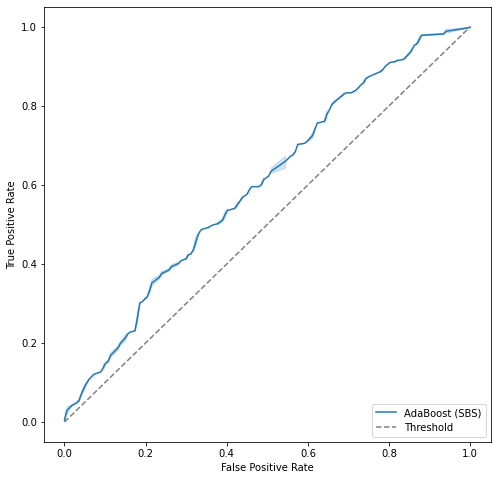

In [38]:
from sklearn.ensemble import AdaBoostClassifier
from lib.experiment_helper import prepare_data_exp_iodds, print_metrics

cols_to_keep = [
  'mc_get_fumo_0.0',
  'mc_get_gravidez_planejada_1.0',
  'mc_get_grupo_sanguineo_0.0',
  'mc_get_grupo_sanguineo_1.0',
  'mc_get_grupo_sanguineo_2.0',
  'mc_get_risco_gestacional_0.0',
  'mc_mul_est_civil_0.0',
  'mc_mul_est_civil_1.0',
  'mc_mul_nivel_inseguranca_0.0',
  'mc_mul_nivel_inseguranca_1.0',
  'mc_mul_qtd_gest_2.0',
  'mc_mul_rec_inf_plan_fam_0.0',
  'mc_dae_escolaridade_1.0',
  'mc_dae_escolaridade_2.0',
  'mc_dae_numero_res_domic_1.0',
  'mc_dae_possui_horta_1.0',
  'mc_dae_rfa_2.0',
  'mc_dae_sit_moradia_1.0',
]
X_train, X_test, y_train, y_test, _ = prepare_data_exp_iodds(df, cols_to_keep)

clf_iodds_ada = AdaBoostClassifier(learning_rate=0.5, n_estimators=50)
clf_iodds_ada.fit(X_train, y_train)

y_pred_iodds_ada = clf_iodds_ada.predict(X_test)
y_pred_proba_iodds_ada = clf_iodds_ada.predict_proba(X_test)
fpr_iodds_ada, tpr_iodds_ada, _ = roc_curve(y_test, y_pred_proba_iodds_ada[:, 1])

roc_score_ada = roc_auc_score(y_test, y_pred_proba_iodds_ada[:, 1])
print(f"\nROC AUC: {roc_score_ada:.4f}")

print_metrics(y_test, y_pred_iodds_ada)

plot_roc_curve(tpr_iodds_ada, fpr_iodds_ada, 'AdaBoost (SBS)', False)

### GBM (SBS):

Starting process to convert dataframe to numpy array...
  -> Removing empty count columns
  -> Removing empty count columns
  -> Shape: (41762, 26)
  -> Applying one-hot encoding
  -> Shape after one-hot encoding: (41762, 97)
  -> Shape after drop dummy columns: (41762, 75)
Applying undersampling...
  -> Shape after undersampling: (2327, 12)
Splitting data...
  -> Shape after splitting: train=(1861, 11) [0 = 659, 1 = 1202] | test=(466, 11) [0 = 167, 1 = 299]

ROC AUC: 0.5686
Metrics:
  -> Accuracy: 0.628755364806867
  -> Macro avg: {'precision': 0.5581168831168831, 'recall': 0.5322632327318607, 'f1-score': 0.5105606653917373, 'support': 466}
  -> Weighted avg: {'precision': 0.5867189677275514, 'recall': 0.628755364806867, 'f1-score': 0.5786903611244758, 'support': 466}
  -> True class results: {'precision': 0.45714285714285713, 'recall': 0.19161676646706588, 'f1-score': 0.27004219409282704, 'support': 167}
  -> False class results: {'precision': 0.6590909090909091, 'recall': 0.87290969

/opt/homebrew/Caskroom/miniforge/base/envs/syphilis-env/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


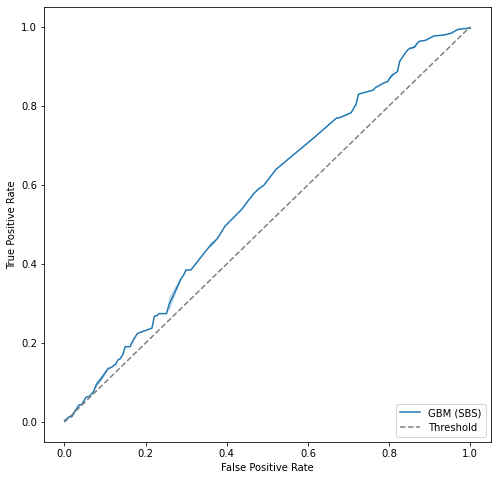

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
from lib.experiment_helper import prepare_data_exp_iodds, print_metrics

cols_to_keep = [
  'mc_get_alcool_0.0',
  'mc_get_risco_gestacional_0.0',
  'mc_mul_est_civil_1.0',
  'mc_mul_nivel_inseguranca_0.0',
  'mc_mul_qtd_aborto_2.0',
  'mc_mul_qtd_filhos_vivos_1.0',
  'mc_mul_tipo_const_casa_1.0',
  'mc_dae_escolaridade_2.0',
  'mc_dae_escolaridade_5.0',
  'mc_dae_sit_moradia_1.0',
  'mc_dae_trat_agua_uso_2.0',
]
X_train, X_test, y_train, y_test, _ = prepare_data_exp_iodds(df, cols_to_keep)

clf_iodds_gbm = GradientBoostingClassifier(learning_rate=0.5, loss='deviance', n_estimators=50)
clf_iodds_gbm.fit(X_train, y_train)

y_pred_iodds_gbm = clf_iodds_gbm.predict(X_test)
y_pred_proba_iodds_gbm = clf_iodds_gbm.predict_proba(X_test)
fpr_iodds_gbm, tpr_iodds_gbm, _ = roc_curve(y_test, y_pred_proba_iodds_gbm[:, 1])

roc_score_gbm = roc_auc_score(y_test, y_pred_proba_iodds_gbm[:, 1])
print(f"\nROC AUC: {roc_score_gbm:.4f}")

print_metrics(y_test, y_pred_iodds_gbm)

plot_roc_curve(tpr_iodds_gbm, fpr_iodds_gbm, 'GBM (SBS)', False)

### XGBoost (SBS):

Starting process to convert dataframe to numpy array...
  -> Removing empty count columns
  -> Removing empty count columns
  -> Shape: (41762, 26)
  -> Applying one-hot encoding
  -> Shape after one-hot encoding: (41762, 97)
  -> Shape after drop dummy columns: (41762, 75)
Applying undersampling...
  -> Shape after undersampling: (2327, 17)
Splitting data...
  -> Shape after splitting: train=(1861, 16) [0 = 659, 1 = 1202] | test=(466, 16) [0 = 167, 1 = 299]
[08:46:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/homebrew/Caskroom/miniforge/base/envs/syphilis-env/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC AUC: 0.5814
Metrics:
  -> Accuracy: 0.6394849785407726
  -> Macro avg: {'precision': 0.5917027894105258, 'recall': 0.5749904872529189, 'f1-score': 0.5745957224830465, 'support': 466}
  -> Weighted avg: {'precision': 0.618889207363942, 'recall': 0.6394849785407726, 'f1-score': 0.6216582598435951, 'support': 466}
  -> True class results: {'precision': 0.49572649572649574, 'recall': 0.3473053892215569, 'f1-score': 0.40845070422535207, 'support': 167}
  -> False class results: {'precision': 0.6876790830945558, 'recall': 0.802675585284281, 'f1-score': 0.7407407407407408, 'support': 299}
  -> Confusion matrix: [[ 58 109], [ 59 240]]


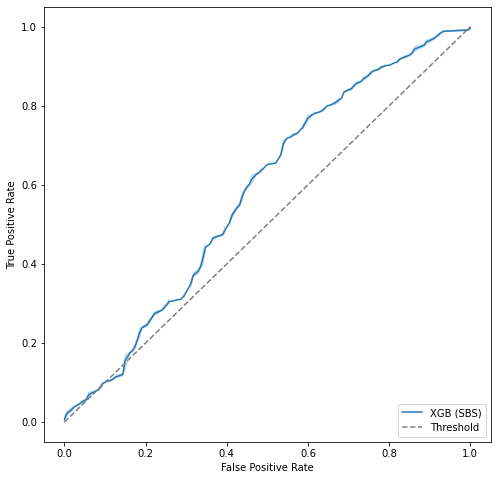

In [40]:
from xgboost import XGBClassifier
from lib.experiment_helper import prepare_data_exp_iodds, print_metrics

cols_to_keep = [
  'mc_get_vacina_anti_tetanica',
  'idade',
  'mc_get_fumo_0.0',
  'mc_get_risco_gestacional_1.0',
  'mc_mul_est_civil_1.0',
  'mc_mul_nivel_inseguranca_0.0',
  'mc_mul_nivel_inseguranca_1.0',
  'mc_mul_qtd_filhos_vivos_1.0',
  'mc_mul_qtd_gest_1.0',
  'mc_mul_rec_inf_plan_fam_0.0',
  'mc_dae_escolaridade_2.0',
  'mc_dae_escolaridade_5.0',
  'mc_dae_numero_res_domic_1.0',
  'mc_dae_possui_arv_frut_1.0',
  'mc_dae_sit_moradia_2.0',
  'mc_dae_trat_agua_uso_2.0',
]
X_train, X_test, y_train, y_test, _ = prepare_data_exp_iodds(df, cols_to_keep)

clf_iodds_xgb = XGBClassifier(learning_rate=0.3, max_depth=5)
clf_iodds_xgb.fit(X_train, y_train)

y_pred_iodds_xgb = clf_iodds_xgb.predict(X_test)
y_pred_proba_iodds_xgb = clf_iodds_xgb.predict_proba(X_test)
fpr_iodds_xgb, tpr_iodds_xgb, _ = roc_curve(y_test, y_pred_proba_iodds_xgb[:, 1])

roc_score_xgb = roc_auc_score(y_test, y_pred_proba_iodds_xgb[:, 1])
print(f"\nROC AUC: {roc_score_xgb:.4f}")

print_metrics(y_test, y_pred_iodds_xgb)

plot_roc_curve(tpr_iodds_xgb, fpr_iodds_xgb, 'XGB (SBS)', False)

### KNN (SBS):

Starting process to convert dataframe to numpy array...
  -> Removing empty count columns
  -> Removing empty count columns
  -> Shape: (41762, 26)
  -> Applying one-hot encoding
  -> Shape after one-hot encoding: (41762, 97)
  -> Shape after drop dummy columns: (41762, 75)
Applying undersampling...
  -> Shape after undersampling: (2327, 42)
Splitting data...
  -> Shape after splitting: train=(1861, 41) [0 = 659, 1 = 1202] | test=(466, 41) [0 = 167, 1 = 299]

ROC AUC: 0.5668
Metrics:
  -> Accuracy: 0.6030042918454935
  -> Macro avg: {'precision': 0.549163276627219, 'recall': 0.542597080087317, 'f1-score': 0.541228747039885, 'support': 466}
  -> Weighted avg: {'precision': 0.5830062004787058, 'recall': 0.6030042918454935, 'f1-score': 0.5889151325038635, 'support': 466}
  -> True class results: {'precision': 0.4296875, 'recall': 0.32934131736526945, 'f1-score': 0.37288135593220334, 'support': 167}
  -> False class results: {'precision': 0.6686390532544378, 'recall': 0.7558528428093646, '

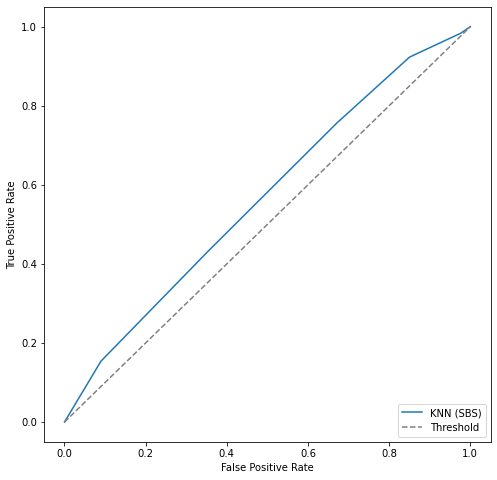

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from lib.experiment_helper import prepare_data_exp_iodds, print_metrics

cols_to_keep = [
  'mc_mul_renda_familiar',
  'mc_get_alcool_0.0',
  'mc_get_alcool_1.0',
  'mc_get_fator_rh_1.0',
  'mc_get_gravidez_planejada_1.0',
  'mc_get_grupo_sanguineo_0.0',
  'mc_get_grupo_sanguineo_2.0',
  'mc_get_grupo_sanguineo_3.0',
  'mc_get_risco_gestacional_1.0',
  'mc_mul_chefe_familia_0.0',
  'mc_mul_est_civil_0.0',
  'mc_mul_est_civil_1.0',
  'mc_mul_est_civil_4.0',
  'mc_mul_nivel_inseguranca_0.0',
  'mc_mul_nivel_inseguranca_1.0',
  'mc_mul_qtd_aborto_0.0',
  'mc_mul_qtd_aborto_2.0',
  'mc_mul_qtd_filhos_vivos_0.0',
  'mc_mul_qtd_filhos_vivos_1.0',
  'mc_mul_qtd_filhos_vivos_2.0',
  'mc_mul_qtd_gest_1.0',
  'mc_mul_qtd_gest_2.0',
  'mc_mul_rec_inf_plan_fam_0.0',
  'mc_mul_tipo_const_casa_1.0',
  'mc_dae_escolaridade_0.0',
  'mc_dae_escolaridade_1.0',
  'mc_dae_escolaridade_2.0',
  'mc_dae_escolaridade_4.0',
  'mc_dae_escolaridade_5.0',
  'mc_dae_mrd_lgd_red_esg_0.0',
  'mc_dae_mrd_lgd_red_esg_1.0',
  'mc_dae_numero_res_domic_2.0',
  'mc_dae_numero_res_domic_4.0',
  'mc_dae_possui_arv_frut_1.0',
  'mc_dae_possui_horta_0.0',
  'mc_dae_rfa_0.0',
  'mc_dae_rfa_1.0',
  'mc_dae_rfa_2.0',
  'mc_dae_sit_moradia_1.0',
  'mc_dae_trat_agua_uso_2.0',
  'mc_dae_trat_agua_uso_3.0',
]
X_train, X_test, y_train, y_test, _ = prepare_data_exp_iodds(df, cols_to_keep)

clf_iodds_knn = KNeighborsClassifier(n_neighbors=5, p=1, weights='uniform')
clf_iodds_knn.fit(X_train, y_train)

y_pred_iodds_knn = clf_iodds_knn.predict(X_test)
y_pred_proba_iodds_knn = clf_iodds_knn.predict_proba(X_test)
fpr_iodds_knn, tpr_iodds_knn, _ = roc_curve(y_test, y_pred_proba_iodds_knn[:, 1])

roc_score_knn = roc_auc_score(y_test, y_pred_proba_iodds_knn[:, 1])
print(f"\nROC AUC: {roc_score_knn:.4f}")

print_metrics(y_test, y_pred_iodds_knn)

plot_roc_curve(tpr_iodds_knn, fpr_iodds_knn, 'KNN (SBS)', False)

### SVM (SFS):

Starting process to convert dataframe to numpy array...
  -> Removing empty count columns
  -> Removing empty count columns
  -> Shape: (41762, 26)
  -> Applying one-hot encoding
  -> Shape after one-hot encoding: (41762, 97)
  -> Shape after drop dummy columns: (41762, 75)
Applying undersampling...
  -> Shape after undersampling: (2327, 16)
Splitting data...
  -> Shape after splitting: train=(1861, 15) [0 = 659, 1 = 1202] | test=(466, 15) [0 = 167, 1 = 299]

ROC AUC: 0.5890
Metrics:
  -> Accuracy: 0.6502145922746781
  -> Macro avg: {'precision': 0.6021730462519936, 'recall': 0.5410550137183827, 'f1-score': 0.5072621711913333, 'support': 466}
  -> Weighted avg: {'precision': 0.619312192400627, 'recall': 0.6502145922746781, 'f1-score': 0.582440336860662, 'support': 466}
  -> True class results: {'precision': 0.5416666666666666, 'recall': 0.15568862275449102, 'f1-score': 0.24186046511627907, 'support': 167}
  -> False class results: {'precision': 0.6626794258373205, 'recall': 0.926421404

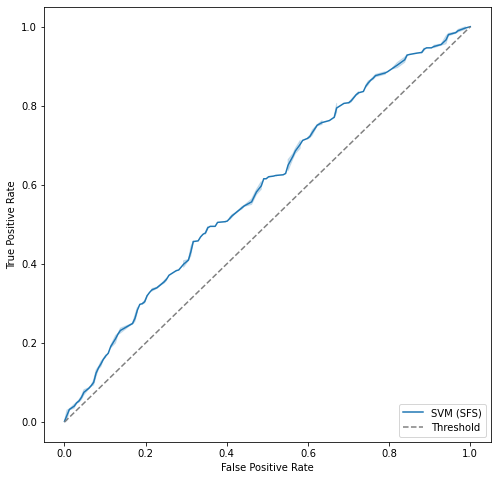

In [42]:
from sklearn.svm import SVC
from lib.experiment_helper import prepare_data_exp_iodds, print_metrics

cols_to_keep = [
  'mc_get_vacina_anti_tetanica',
  'mc_get_fator_rh_0.0',
  'mc_get_fumo_0.0',
  'mc_mul_chefe_familia_0.0',
  'mc_mul_est_civil_1.0',
  'mc_mul_nivel_inseguranca_0.0',
  'mc_mul_qtd_filhos_vivos_0.0',
  'mc_mul_qtd_filhos_vivos_1.0',
  'mc_mul_qtd_filhos_vivos_3.0',
  'mc_mul_qtd_gest_2.0',
  'mc_dae_escolaridade_4.0',
  'mc_dae_escolaridade_5.0',
  'mc_dae_escolaridade_6.0',
  'mc_dae_sit_moradia_0.0',
  'mc_dae_trat_agua_uso_2.0',
]
X_train, X_test, y_train, y_test, _ = prepare_data_exp_iodds(df, cols_to_keep)

clf_iodds_svm = SVC(gamma='scale', kernel='rbf', probability=True)
clf_iodds_svm.fit(X_train, y_train)

y_pred_iodds_svm = clf_iodds_svm.predict(X_test)
y_pred_proba_iodds_svm = clf_iodds_svm.predict_proba(X_test)
fpr_iodds_svm, tpr_iodds_svm, _ = roc_curve(y_test, y_pred_proba_iodds_svm[:, 1])

roc_score_svm = roc_auc_score(y_test, y_pred_proba_iodds_svm[:, 1])
print(f"\nROC AUC: {roc_score_svm:.4f}")

print_metrics(y_test, y_pred_iodds_svm)

plot_roc_curve(tpr_iodds_svm, fpr_iodds_svm, 'SVM (SFS)', False)

### All:

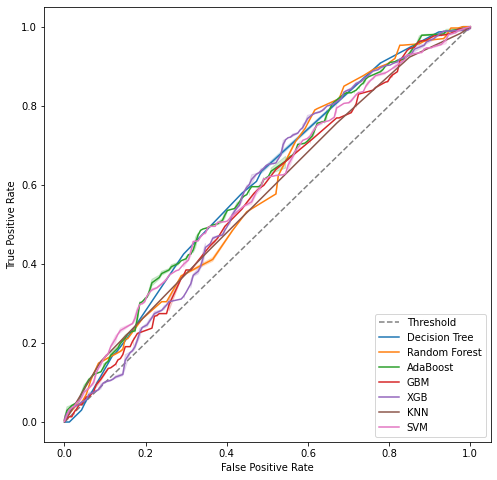

In [43]:
plt.figure(figsize = (8, 8))
ax = sns.lineplot(x = [0, 1], y = [0, 1], color = 'gray', label='Threshold')
ax.lines[0].set_linestyle('--')

sns.lineplot(x = fpr_iodds_decision_tree, y = tpr_iodds_decision_tree, label='Decision Tree')
sns.lineplot(x = fpr_iodds_rf, y = tpr_iodds_rf, label='Random Forest')
sns.lineplot(x = fpr_iodds_ada, y = tpr_iodds_ada, label='AdaBoost')
sns.lineplot(x = fpr_iodds_gbm, y = tpr_iodds_gbm, label='GBM')
sns.lineplot(x = fpr_iodds_xgb, y = tpr_iodds_xgb, label='XGB')
sns.lineplot(x = fpr_iodds_knn, y = tpr_iodds_knn, label='KNN')
sns.lineplot(x = fpr_iodds_svm, y = tpr_iodds_svm, label='SVM')

plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")

## BODDS - Exp 6

### Decision tree (SFS):

Starting process to convert dataframe to numpy array...
  -> Removing empty count columns
  -> Removing empty count columns
  -> Shape: (41762, 26)
  -> Applying one-hot encoding
  -> Shape after one-hot encoding: (41762, 97)
  -> Shape after drop dummy columns: (41762, 75)
Applying undersampling...
  -> Shape after undersampling: (1652, 11)
Splitting data...
  -> Shape after splitting: train=(1321, 10) [0 = 660, 1 = 661] | test=(331, 10) [0 = 166, 1 = 165]

ROC AUC: 0.5545
Metrics:
  -> Accuracy: 0.5649546827794562
  -> Macro avg: {'precision': 0.5652126018946905, 'recall': 0.5648411829134721, 'f1-score': 0.5642825800789821, 'support': 331}
  -> Weighted avg: {'precision': 0.5652022851300811, 'recall': 0.5649546827794562, 'f1-score': 0.564334280286711, 'support': 331}
  -> True class results: {'precision': 0.5617977528089888, 'recall': 0.6024096385542169, 'f1-score': 0.5813953488372093, 'support': 166}
  -> False class results: {'precision': 0.5686274509803921, 'recall': 0.52727272727

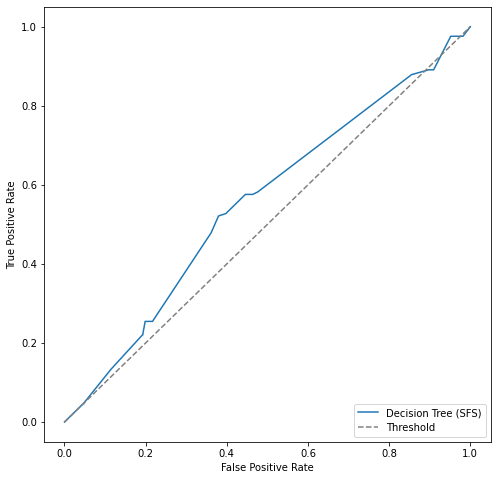

In [44]:
from sklearn.tree import DecisionTreeClassifier
from lib.experiment_helper import prepare_data_exp_bodds, print_metrics

cols_to_keep = [
  'mc_get_grupo_sanguineo_2.0',
  'mc_get_grupo_sanguineo_3.0',
  'mc_mul_est_civil_1.0',
  'mc_mul_est_civil_2.0',
  'mc_mul_nivel_inseguranca_0.0',
  'mc_mul_qtd_filhos_vivos_2.0',
  'mc_dae_escolaridade_0.0',
  'mc_dae_escolaridade_7.0',
  'mc_dae_escolaridade_8.0',
  'mc_dae_trat_agua_uso_3.0',
]
X_train, X_test, y_train, y_test, _ = prepare_data_exp_bodds(df, cols_to_keep)

clf_bodds_decision_tree = DecisionTreeClassifier(criterion='entropy', splitter='random')
clf_bodds_decision_tree.fit(X_train, y_train)

y_pred_bodds_decision_tree = clf_bodds_decision_tree.predict(X_test)
y_pred_proba_bodds_decision_tree = clf_bodds_decision_tree.predict_proba(X_test)
fpr_bodds_decision_tree, tpr_bodds_decision_tree, _ = roc_curve(y_test, y_pred_proba_bodds_decision_tree[:, 1])

roc_score_decision_tree = roc_auc_score(y_test, y_pred_proba_bodds_decision_tree[:, 1])
print(f"\nROC AUC: {roc_score_decision_tree:.4f}")

print_metrics(y_test, y_pred_bodds_decision_tree)

plot_roc_curve(tpr_bodds_decision_tree, fpr_bodds_decision_tree, 'Decision Tree (SFS)', False)

### Random forest (SFS):

Starting process to convert dataframe to numpy array...
  -> Removing empty count columns
  -> Removing empty count columns
  -> Shape: (41762, 26)
  -> Applying one-hot encoding
  -> Shape after one-hot encoding: (41762, 97)
  -> Shape after drop dummy columns: (41762, 75)
Applying undersampling...
  -> Shape after undersampling: (1652, 19)
Splitting data...
  -> Shape after splitting: train=(1321, 18) [0 = 660, 1 = 661] | test=(331, 18) [0 = 166, 1 = 165]

ROC AUC: 0.5698
Metrics:
  -> Accuracy: 0.5438066465256798
  -> Macro avg: {'precision': 0.5441404519273372, 'recall': 0.5436473165388828, 'f1-score': 0.5424535642685171, 'support': 331}
  -> Weighted avg: {'precision': 0.544130914630147, 'recall': 0.5438066465256798, 'f1-score': 0.542528735505026, 'support': 331}
  -> True class results: {'precision': 0.5409836065573771, 'recall': 0.5963855421686747, 'f1-score': 0.5673352435530086, 'support': 166}
  -> False class results: {'precision': 0.5472972972972973, 'recall': 0.490909090909

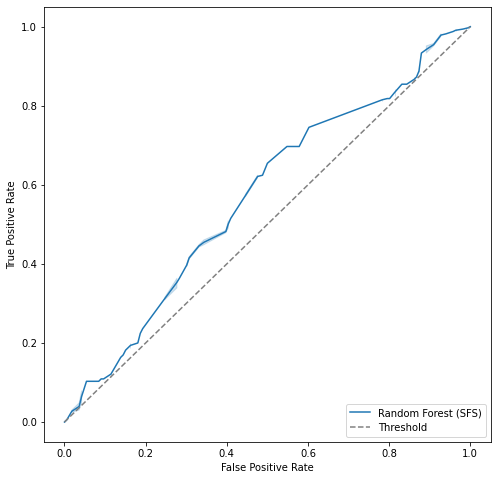

In [45]:
from sklearn.ensemble import RandomForestClassifier
from lib.experiment_helper import prepare_data_exp_bodds, print_metrics

cols_to_keep = [
  'mc_get_fumo_0.0',
  'mc_get_grupo_sanguineo_1.0',
  'mc_get_grupo_sanguineo_2.0',
  'mc_mul_est_civil_1.0',
  'mc_mul_est_civil_2.0',
  'mc_mul_est_civil_3.0',
  'mc_mul_nivel_inseguranca_0.0',
  'mc_mul_qtd_gest_0.0',
  'mc_mul_tipo_const_casa_0.0',
  'mc_mul_tipo_const_casa_1.0',
  'mc_dae_escolaridade_1.0',
  'mc_dae_escolaridade_3.0',
  'mc_dae_escolaridade_8.0',
  'mc_dae_rfa_2.0',
  'mc_dae_trat_agua_uso_0.0',
  'mc_dae_trat_agua_uso_1.0',
  'mc_dae_trat_agua_uso_2.0',
  'mc_dae_trat_agua_uso_3.0',
]
X_train, X_test, y_train, y_test, _ = prepare_data_exp_bodds(df, cols_to_keep)

clf_bodds_rf = RandomForestClassifier(criterion='entropy', n_estimators=100)
clf_bodds_rf.fit(X_train, y_train)

y_pred_bodds_rf = clf_bodds_rf.predict(X_test)
y_pred_proba_bodds_rf = clf_bodds_rf.predict_proba(X_test)
fpr_bodds_rf, tpr_bodds_rf, _ = roc_curve(y_test, y_pred_proba_bodds_rf[:, 1])

roc_score_rf = roc_auc_score(y_test, y_pred_proba_bodds_rf[:, 1])
print(f"\nROC AUC: {roc_score_rf:.4f}")

print_metrics(y_test, y_pred_bodds_rf)

plot_roc_curve(tpr_bodds_rf, fpr_bodds_rf, 'Random Forest (SFS)', False)

### AdaBoost (SFS):

Starting process to convert dataframe to numpy array...
  -> Removing empty count columns
  -> Removing empty count columns
  -> Shape: (41762, 26)
  -> Applying one-hot encoding
  -> Shape after one-hot encoding: (41762, 97)
  -> Shape after drop dummy columns: (41762, 75)
Applying undersampling...
  -> Shape after undersampling: (1652, 26)
Splitting data...
  -> Shape after splitting: train=(1321, 25) [0 = 660, 1 = 661] | test=(331, 25) [0 = 166, 1 = 165]

ROC AUC: 0.6044
Metrics:
  -> Accuracy: 0.5589123867069486
  -> Macro avg: {'precision': 0.5593517221033999, 'recall': 0.558762322015334, 'f1-score': 0.5577458086243503, 'support': 331}
  -> Weighted avg: {'precision': 0.5593384089095681, 'recall': 0.5589123867069486, 'f1-score': 0.5578144308645031, 'support': 331}
  -> True class results: {'precision': 0.554945054945055, 'recall': 0.608433734939759, 'f1-score': 0.5804597701149425, 'support': 166}
  -> False class results: {'precision': 0.5637583892617449, 'recall': 0.5090909090909

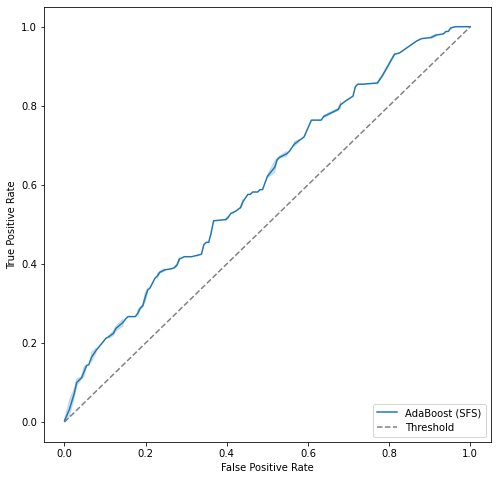

In [46]:
from sklearn.ensemble import AdaBoostClassifier
from lib.experiment_helper import prepare_data_exp_bodds, print_metrics

cols_to_keep = [
  'mc_get_vacina_anti_tetanica',
  'mc_get_fator_rh_1.0',
  'mc_get_gravidez_planejada_0.0',
  'mc_get_gravidez_planejada_1.0',
  'mc_get_grupo_sanguineo_3.0',
  'mc_get_risco_gestacional_1.0',
  'mc_mul_chefe_familia_0.0',
  'mc_mul_est_civil_1.0',
  'mc_mul_est_civil_3.0',
  'mc_mul_nivel_inseguranca_0.0',
  'mc_mul_qtd_aborto_2.0',
  'mc_mul_qtd_filhos_vivos_1.0',
  'mc_mul_qtd_filhos_vivos_3.0',
  'mc_mul_qtd_gest_3.0',
  'mc_mul_rec_inf_plan_fam_1.0',
  'mc_mul_tipo_const_casa_3.0',
  'mc_dae_escolaridade_0.0',
  'mc_dae_escolaridade_1.0',
  'mc_dae_escolaridade_4.0',
  'mc_dae_escolaridade_5.0',
  'mc_dae_escolaridade_7.0',
  'mc_dae_numero_res_domic_0.0',
  'mc_dae_numero_res_domic_1.0',
  'mc_dae_numero_res_domic_3.0',
  'mc_dae_possui_horta_0.0',
]
X_train, X_test, y_train, y_test, _ = prepare_data_exp_bodds(df, cols_to_keep)

clf_bodds_ada = AdaBoostClassifier(learning_rate=0.5, n_estimators=50)
clf_bodds_ada.fit(X_train, y_train)

y_pred_bodds_ada = clf_bodds_ada.predict(X_test)
y_pred_proba_bodds_ada = clf_bodds_ada.predict_proba(X_test)
fpr_bodds_ada, tpr_bodds_ada, _ = roc_curve(y_test, y_pred_proba_bodds_ada[:, 1])

roc_score_ada = roc_auc_score(y_test, y_pred_proba_bodds_ada[:, 1])
print(f"\nROC AUC: {roc_score_ada:.4f}")

print_metrics(y_test, y_pred_bodds_ada)

plot_roc_curve(tpr_bodds_ada, fpr_bodds_ada, 'AdaBoost (SFS)', False)

### GBM (SFS):

Starting process to convert dataframe to numpy array...
  -> Removing empty count columns
  -> Removing empty count columns
  -> Shape: (41762, 26)
  -> Applying one-hot encoding
  -> Shape after one-hot encoding: (41762, 97)
  -> Shape after drop dummy columns: (41762, 75)
Applying undersampling...
  -> Shape after undersampling: (1652, 16)
Splitting data...
  -> Shape after splitting: train=(1321, 15) [0 = 660, 1 = 661] | test=(331, 15) [0 = 166, 1 = 165]

ROC AUC: 0.5620
Metrics:
  -> Accuracy: 0.5619335347432024
  -> Macro avg: {'precision': 0.562128549416685, 'recall': 0.561829134720701, 'f1-score': 0.5613570103366021, 'support': 331}
  -> Weighted avg: {'precision': 0.5621200705178379, 'recall': 0.5619335347432024, 'f1-score': 0.5614050540371521, 'support': 331}
  -> True class results: {'precision': 0.559322033898305, 'recall': 0.5963855421686747, 'f1-score': 0.5772594752186588, 'support': 166}
  -> False class results: {'precision': 0.564935064935065, 'recall': 0.52727272727272

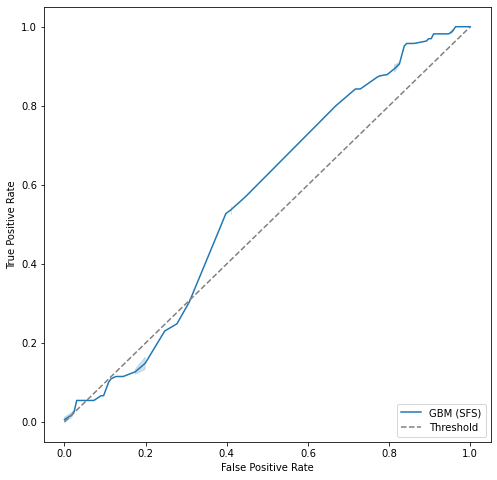

In [47]:
from sklearn.ensemble import GradientBoostingClassifier
from lib.experiment_helper import prepare_data_exp_bodds, print_metrics

cols_to_keep = [
  'mc_get_fumo_0.0',
  'mc_get_grupo_sanguineo_2.0',
  'mc_get_grupo_sanguineo_3.0',
  'mc_mul_est_civil_1.0',
  'mc_mul_nivel_inseguranca_0.0',
  'mc_mul_qtd_aborto_1.0',
  'mc_mul_tipo_const_casa_2.0',
  'mc_mul_tipo_const_casa_3.0',
  'mc_dae_escolaridade_8.0',
  'mc_dae_numero_res_domic_0.0',
  'mc_dae_numero_res_domic_1.0',
  'mc_dae_possui_arv_frut_0.0',
  'mc_dae_rfa_2.0',
  'mc_dae_trat_agua_uso_1.0',
  'mc_dae_trat_agua_uso_3.0',
]
X_train, X_test, y_train, y_test, _ = prepare_data_exp_bodds(df, cols_to_keep)

clf_bodds_gbm = GradientBoostingClassifier(learning_rate=1, loss='exponential', n_estimators=150)
clf_bodds_gbm.fit(X_train, y_train)

y_pred_bodds_gbm = clf_bodds_gbm.predict(X_test)
y_pred_proba_bodds_gbm = clf_bodds_gbm.predict_proba(X_test)
fpr_bodds_gbm, tpr_bodds_gbm, _ = roc_curve(y_test, y_pred_proba_bodds_gbm[:, 1])

roc_score_gbm = roc_auc_score(y_test, y_pred_proba_bodds_gbm[:, 1])
print(f"\nROC AUC: {roc_score_gbm:.4f}")

print_metrics(y_test, y_pred_bodds_gbm)

plot_roc_curve(tpr_bodds_gbm, fpr_bodds_gbm, 'GBM (SFS)', False)

### XGBoost (SBS):

Starting process to convert dataframe to numpy array...
  -> Removing empty count columns
  -> Removing empty count columns
  -> Shape: (41762, 26)
  -> Applying one-hot encoding
  -> Shape after one-hot encoding: (41762, 97)
  -> Shape after drop dummy columns: (41762, 75)
Applying undersampling...
  -> Shape after undersampling: (1652, 36)
Splitting data...
  -> Shape after splitting: train=(1321, 35) [0 = 660, 1 = 661] | test=(331, 35) [0 = 166, 1 = 165]
[08:46:35] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/homebrew/Caskroom/miniforge/base/envs/syphilis-env/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC AUC: 0.6152
Metrics:
  -> Accuracy: 0.5740181268882175
  -> Macro avg: {'precision': 0.5740497076023392, 'recall': 0.5739686016794451, 'f1-score': 0.5738781100205432, 'support': 331}
  -> Weighted avg: {'precision': 0.574046836628328, 'recall': 0.5740181268882175, 'f1-score': 0.5739014461651557, 'support': 331}
  -> True class results: {'precision': 0.5730994152046783, 'recall': 0.5903614457831325, 'f1-score': 0.5816023738872403, 'support': 166}
  -> False class results: {'precision': 0.575, 'recall': 0.5575757575757576, 'f1-score': 0.5661538461538462, 'support': 165}
  -> Confusion matrix: [[98 68], [73 92]]


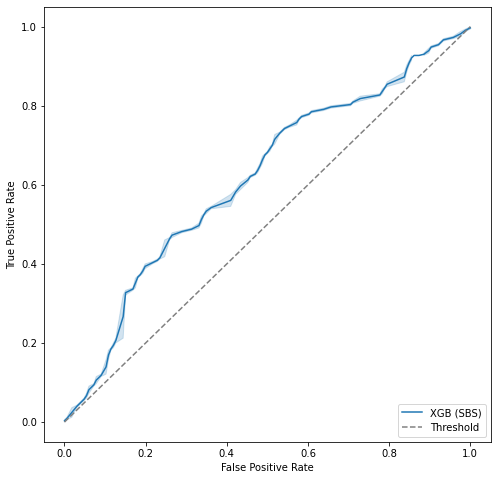

In [48]:
from xgboost import XGBClassifier
from lib.experiment_helper import prepare_data_exp_bodds, print_metrics

cols_to_keep = [
  'mc_get_vacina_anti_tetanica',
  'idade',
  'mc_get_alcool_0.0',
  'mc_get_alcool_1.0',
  'mc_get_fumo_1.0',
  'mc_get_gravidez_planejada_0.0',
  'mc_get_grupo_sanguineo_0.0',
  'mc_get_grupo_sanguineo_2.0',
  'mc_get_grupo_sanguineo_3.0',
  'mc_get_risco_gestacional_0.0',
  'mc_get_risco_gestacional_1.0',
  'mc_mul_chefe_familia_0.0',
  'mc_mul_chefe_familia_1.0',
  'mc_mul_est_civil_4.0',
  'mc_mul_nivel_inseguranca_0.0',
  'mc_mul_qtd_filhos_vivos_2.0',
  'mc_mul_qtd_gest_0.0',
  'mc_mul_qtd_gest_2.0',
  'mc_mul_rec_inf_plan_fam_0.0',
  'mc_mul_tipo_const_casa_1.0',
  'mc_mul_tipo_const_casa_4.0',
  'mc_dae_escolaridade_5.0',
  'mc_dae_escolaridade_8.0',
  'mc_dae_mrd_lgd_red_esg_0.0',
  'mc_dae_numero_res_domic_4.0',
  'mc_dae_possui_arv_frut_0.0',
  'mc_dae_possui_arv_frut_1.0',
  'mc_dae_possui_horta_0.0',
  'mc_dae_rfa_0.0',
  'mc_dae_rfa_1.0',
  'mc_dae_sit_moradia_1.0',
  'mc_dae_sit_moradia_2.0',
  'mc_dae_trat_agua_uso_0.0',
  'mc_dae_trat_agua_uso_1.0',
  'mc_dae_trat_agua_uso_3.0',
]
X_train, X_test, y_train, y_test, _ = prepare_data_exp_bodds(df, cols_to_keep)

clf_bodds_xgb = XGBClassifier(learning_rate=0.3, max_depth=5)
clf_bodds_xgb.fit(X_train, y_train)

y_pred_bodds_xgb = clf_bodds_xgb.predict(X_test)
y_pred_proba_bodds_xgb = clf_bodds_xgb.predict_proba(X_test)
fpr_bodds_xgb, tpr_bodds_xgb, _ = roc_curve(y_test, y_pred_proba_bodds_xgb[:, 1])

roc_score_xgb = roc_auc_score(y_test, y_pred_proba_bodds_xgb[:, 1])
print(f"\nROC AUC: {roc_score_xgb:.4f}")

print_metrics(y_test, y_pred_bodds_xgb)

plot_roc_curve(tpr_bodds_xgb, fpr_bodds_xgb, 'XGB (SBS)', False)

### KNN (SFS):

Starting process to convert dataframe to numpy array...
  -> Removing empty count columns
  -> Removing empty count columns
  -> Shape: (41762, 26)
  -> Applying one-hot encoding
  -> Shape after one-hot encoding: (41762, 97)
  -> Shape after drop dummy columns: (41762, 75)
Applying undersampling...
  -> Shape after undersampling: (1652, 11)
Splitting data...
  -> Shape after splitting: train=(1321, 10) [0 = 660, 1 = 661] | test=(331, 10) [0 = 166, 1 = 165]

ROC AUC: 0.5631
Metrics:
  -> Accuracy: 0.5377643504531722
  -> Macro avg: {'precision': 0.5378333942272562, 'recall': 0.5378057685286601, 'f1-score': 0.5376968369163357, 'support': 331}
  -> Weighted avg: {'precision': 0.53784106575771, 'recall': 0.5377643504531722, 'f1-score': 0.5376799585321266, 'support': 331}
  -> True class results: {'precision': 0.5403726708074534, 'recall': 0.5240963855421686, 'f1-score': 0.5321100917431192, 'support': 166}
  -> False class results: {'precision': 0.5352941176470588, 'recall': 0.551515151515

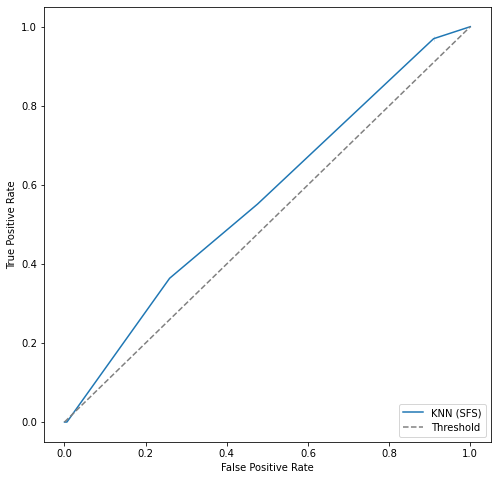

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from lib.experiment_helper import prepare_data_exp_bodds, print_metrics

cols_to_keep = [
  'mc_get_fator_rh_1.0',
  'mc_get_fumo_0.0',
  'mc_get_grupo_sanguineo_0.0',
  'mc_get_grupo_sanguineo_2.0',
  'mc_get_grupo_sanguineo_3.0',
  'mc_mul_est_civil_1.0',
  'mc_mul_nivel_inseguranca_0.0',
  'mc_mul_tipo_const_casa_1.0',
  'mc_mul_tipo_const_casa_3.0',
  'mc_dae_escolaridade_7.0',
]
X_train, X_test, y_train, y_test, _ = prepare_data_exp_bodds(df, cols_to_keep)

clf_bodds_knn = KNeighborsClassifier(n_neighbors=5, p=1, weights='uniform')
clf_bodds_knn.fit(X_train, y_train)

y_pred_bodds_knn = clf_bodds_knn.predict(X_test)
y_pred_proba_bodds_knn = clf_bodds_knn.predict_proba(X_test)
fpr_bodds_knn, tpr_bodds_knn, _ = roc_curve(y_test, y_pred_proba_bodds_knn[:, 1])

roc_score_knn = roc_auc_score(y_test, y_pred_proba_bodds_knn[:, 1])
print(f"\nROC AUC: {roc_score_knn:.4f}")

print_metrics(y_test, y_pred_bodds_knn)

plot_roc_curve(tpr_bodds_knn, fpr_bodds_knn, 'KNN (SFS)', False)

### SVM (SFS):

Starting process to convert dataframe to numpy array...
  -> Removing empty count columns
  -> Removing empty count columns
  -> Shape: (41762, 26)
  -> Applying one-hot encoding
  -> Shape after one-hot encoding: (41762, 97)
  -> Shape after drop dummy columns: (41762, 75)
Applying undersampling...
  -> Shape after undersampling: (1652, 15)
Splitting data...
  -> Shape after splitting: train=(1321, 14) [0 = 660, 1 = 661] | test=(331, 14) [0 = 166, 1 = 165]

ROC AUC: 0.6000
Metrics:
  -> Accuracy: 0.5981873111782477
  -> Macro avg: {'precision': 0.598398420359807, 'recall': 0.5982475355969332, 'f1-score': 0.598055238530016, 'support': 331}
  -> Weighted avg: {'precision': 0.5984146595276192, 'recall': 0.5981873111782477, 'f1-score': 0.5980332264219773, 'support': 331}
  -> True class results: {'precision': 0.6037735849056604, 'recall': 0.5783132530120482, 'f1-score': 0.5907692307692307, 'support': 166}
  -> False class results: {'precision': 0.5930232558139535, 'recall': 0.618181818181

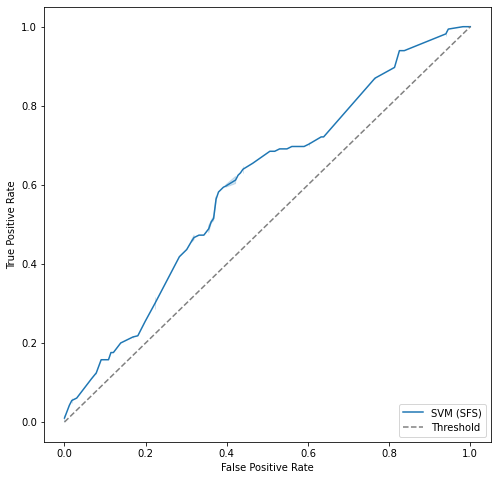

In [50]:
from sklearn.svm import SVC
from lib.experiment_helper import prepare_data_exp_bodds, print_metrics

cols_to_keep = [
  'mc_get_fumo_0.0',
  'mc_get_grupo_sanguineo_2.0',
  'mc_get_grupo_sanguineo_3.0',
  'mc_mul_est_civil_1.0',
  'mc_mul_est_civil_2.0',
  'mc_mul_est_civil_3.0',
  'mc_mul_nivel_inseguranca_0.0',
  'mc_mul_qtd_filhos_vivos_2.0',
  'mc_mul_tipo_const_casa_1.0',
  'mc_dae_escolaridade_5.0',
  'mc_dae_escolaridade_8.0',
  'mc_dae_rfa_1.0',
  'mc_dae_trat_agua_uso_0.0',
  'mc_dae_trat_agua_uso_3.0',
]
X_train, X_test, y_train, y_test, _ = prepare_data_exp_bodds(df, cols_to_keep)

clf_bodds_svm = SVC(gamma='scale', kernel='rbf', probability=True)
clf_bodds_svm.fit(X_train, y_train)

y_pred_bodds_svm = clf_bodds_svm.predict(X_test)
y_pred_proba_bodds_svm = clf_bodds_svm.predict_proba(X_test)
fpr_bodds_svm, tpr_bodds_svm, _ = roc_curve(y_test, y_pred_proba_bodds_svm[:, 1])

roc_score_svm = roc_auc_score(y_test, y_pred_proba_bodds_svm[:, 1])
print(f"\nROC AUC: {roc_score_svm:.4f}")

print_metrics(y_test, y_pred_bodds_svm)

plot_roc_curve(tpr_bodds_svm, fpr_bodds_svm, 'SVM (SFS)', False)

### All:

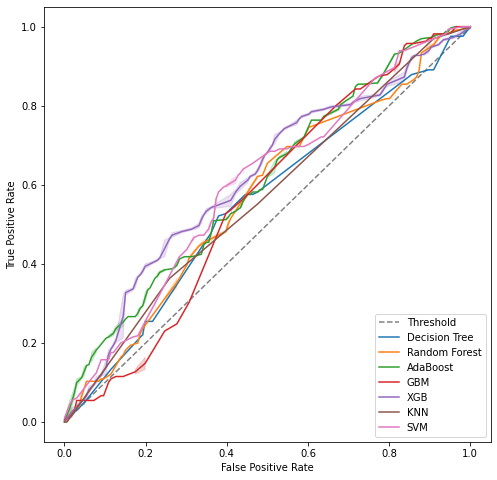

In [51]:
plt.figure(figsize = (8, 8))
ax = sns.lineplot(x = [0, 1], y = [0, 1], color = 'gray', label='Threshold')
ax.lines[0].set_linestyle('--')

sns.lineplot(x = fpr_bodds_decision_tree, y = tpr_bodds_decision_tree, label='Decision Tree')
sns.lineplot(x = fpr_bodds_rf, y = tpr_bodds_rf, label='Random Forest')
sns.lineplot(x = fpr_bodds_ada, y = tpr_bodds_ada, label='AdaBoost')
sns.lineplot(x = fpr_bodds_gbm, y = tpr_bodds_gbm, label='GBM')
sns.lineplot(x = fpr_bodds_xgb, y = tpr_bodds_xgb, label='XGB')
sns.lineplot(x = fpr_bodds_knn, y = tpr_bodds_knn, label='KNN')
sns.lineplot(x = fpr_bodds_svm, y = tpr_bodds_svm, label='SVM')

plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")